In [1]:
import pandas as pd
import sqlite3

In [2]:
#Membuat koneksi sqlite 3
cnx = sqlite3.connect('foo.db')

In [3]:
#Memuat data SQLITE kedalam dataframe pandas
df_customers = pd.read_sql_query("SELECT * FROM olist_customers_dataset", cnx)
df_geolocations = pd.read_sql_query("SELECT * FROM olist_geolocation_dataset", cnx)
df_orderitems = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", cnx)
df_payments = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", cnx)
df_reviews = pd.read_sql_query("SELECT * FROM olist_order_reviews_dataset", cnx)
df_orders = pd.read_sql_query("SELECT * FROM olist_orders_dataset", cnx)
df_products = pd.read_sql_query("SELECT * FROM olist_products_dataset", cnx)
df_sellers = pd.read_sql_query("SELECT * FROM olist_sellers_dataset", cnx)

In [4]:
#Melihat status order
df_orders[df_orders['order_status'] == "created"]

order_id                       customer_id  \
7434   b5359909123fa03c50bdb0cfed07f098  438449d4af8980d107bf04571413a8e7   
9238   dba5062fbda3af4fb6c33b1e040ca38f  964a6df3d9bdf60fe3e7b8bb69ed893a   
21441  7a4df5d8cff4090e541401a20a22bb80  725e9c75605414b21fd8c8d5a1c2f1d6   
55086  35de4050331c6c644cddc86f4f2d0d64  4ee64f4bfc542546f422da0aeb462853   
58958  90ab3e7d52544ec7bc3363c82689965f  7d61b9f4f216052ba664f22e9c504ef1   

      order_status order_purchase_timestamp order_approved_at  \
7434       created      2017-12-05 01:07:52                     
9238       created      2018-02-09 17:21:04                     
21441      created      2017-11-25 11:10:33                     
55086      created      2017-12-05 01:07:58                     
58958      created      2017-11-06 13:12:34                     

      order_delivered_carrier_date order_delivered_customer_date  \
7434                                                               
9238                                                               
21441                                                              
55086                                                              
58958                                                              

      order_estimated_delivery_date  
7434            2018-01-11 00:00:00  
9238            2018-03-07 00:00:00  
21441           2017-12-12 00:00:00  
55086           2018-01-08 00:00:00  
58958           2017-12-01 00:00:00

In [5]:
# Mengubah kolom order_purchase_timestamp menjadi tipe datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['date_payments'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y/%m/%d')

In [6]:
df_orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date date_payments  
0               2017-10-18 00:00:00    2017/10/02  
1               2018-08-13 00:00:00    2018/07/24  
2               2018-09-04 00:00:00    2018/08/08  
3               2017-12-15 00:00:00    2017/11/18  
4               2018-02-26 00:00:00    2018/02/13  
...                             ...           ...  
99436           2017-03-28 00:00:00    2017/03/09  
99437           2018-03-02 00:00:00    2018/02/06  
99438           2017-09-27 00:00:00    2017/08/27  
99439           2018-02-15 00:00:00    2018/01/08  
99440           2018-04-03 00:00:00    2018/03/08  

[99441 rows x 9 columns]

In [7]:
#Melihat customer id yang memiliki avg_items_per_order = 7
df_orders[df_orders['date_payments']  == '2018/10/17']

order_id                       customer_id  \
60938  10a045cdf6a5650c21e9cfeb60384c16  a4b417188addbc05b26b72d5e44837a1   

      order_status order_purchase_timestamp order_approved_at  \
60938     canceled      2018-10-17 17:30:18                     

      order_delivered_carrier_date order_delivered_customer_date  \
60938                                                              

      order_estimated_delivery_date date_payments  
60938           2018-10-30 00:00:00    2018/10/17

In [8]:
#Membuat tabel yang menghitung frekuensi order per customer unique

# Langkah 1: Menghitung jumlah order untuk setiap customer_id
order_counts = df_orders.groupby('customer_id').size().reset_index(name='order_count')

# Langkah 2: Menggabungkan dengan df_customers untuk mendapatkan customer_unique_id
order_counts = pd.merge(order_counts, df_customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# Langkah 3: Mengelompokkan berdasarkan customer_unique_id
final_counts = order_counts.groupby('customer_unique_id')['order_count'].sum().reset_index()


In [9]:
#Mengecek dataframe
final_counts

customer_unique_id  order_count
0      0000366f3b9a7992bf8c76cfdf3221e2            1
1      0000b849f77a49e4a4ce2b2a4ca5be3f            1
2      0000f46a3911fa3c0805444483337064            1
3      0000f6ccb0745a6a4b88665a16c9f078            1
4      0004aac84e0df4da2b147fca70cf8255            1
...                                 ...          ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684            1
96092  fffea47cd6d3cc0a88bd621562a9d061            1
96093  ffff371b4d645b6ecea244b27531430a            1
96094  ffff5962728ec6157033ef9805bacc48            1
96095  ffffd2657e2aad2907e67c3e9daecbeb            1

[96096 rows x 2 columns]

In [10]:
#Mengelompokkan Custiomer unique id berdasarkan frekuensi order
def classify_frequency(count):
    if count < 4:
        return 'rendah'
    elif 4 <= count <= 8:
        return 'menengah'
    else:
        return 'tinggi'

final_counts['class'] = final_counts['order_count'].apply(classify_frequency)

In [11]:
#melakukan pengecekan dataframe
final_counts

customer_unique_id  order_count   class
0      0000366f3b9a7992bf8c76cfdf3221e2            1  rendah
1      0000b849f77a49e4a4ce2b2a4ca5be3f            1  rendah
2      0000f46a3911fa3c0805444483337064            1  rendah
3      0000f6ccb0745a6a4b88665a16c9f078            1  rendah
4      0004aac84e0df4da2b147fca70cf8255            1  rendah
...                                 ...          ...     ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684            1  rendah
96092  fffea47cd6d3cc0a88bd621562a9d061            1  rendah
96093  ffff371b4d645b6ecea244b27531430a            1  rendah
96094  ffff5962728ec6157033ef9805bacc48            1  rendah
96095  ffffd2657e2aad2907e67c3e9daecbeb            1  rendah

[96096 rows x 3 columns]

In [12]:
#Melakukan count berdasarkan class
final_counts.value_counts("class")

class
rendah      96047
menengah       47
tinggi          2
Name: count, dtype: int64

In [13]:
#Melihat customer id yang berada di class tinggi
final_counts[final_counts['class'] == "tinggi"]

customer_unique_id  order_count   class
23472  3e43e6105506432c953e165fb2acf44c            9  tinggi
52973  8d50f5eadf50201ccdcedfb9e2ac8455           17  tinggi

In [14]:
#Menghitung min, max, mean, median, dan count dari order_count berdsarkan class
final_counts.groupby('class').agg({'order_count':['min','max','mean','median','count']})

order_count                             
                 min max       mean median  count
class                                            
menengah           4   7   4.617021    4.0     47
rendah             1   3   1.032807    1.0  96047
tinggi             9  17  13.000000   13.0      2

In [15]:
#Melihat persebaran frekuensi order
final_counts.query('order_count>0')['order_count'].describe(percentiles=[0.5,0.8,0.9,0.95,0.99,0.999])

count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
50%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          2.000000
99.9%        3.000000
max         17.000000
Name: order_count, dtype: float64

In [16]:
# pip install --upgrade matplotlib

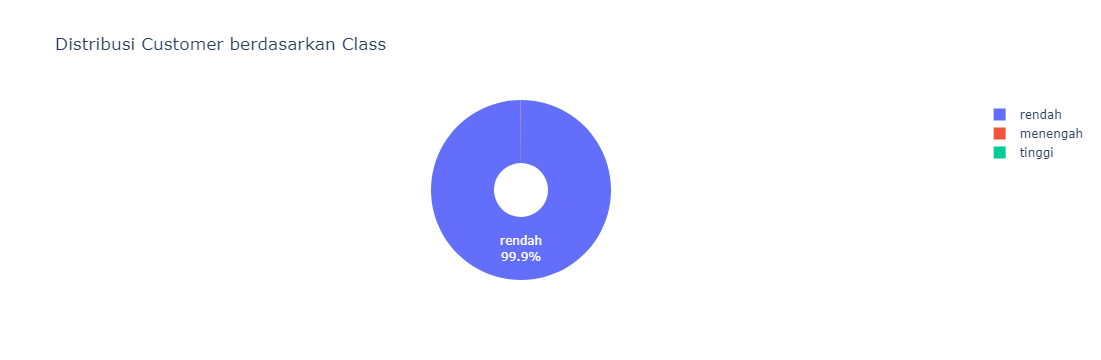

In [17]:
#Membuat pie chart frekuensi order by class customer menggunakan plotly

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import plotly.express as px

# Contoh DataFrame (silakan sesuaikan dengan data Anda)
# df = pd.read_csv('path_to_your_data.csv')

# Misalkan DataFrame-nya seperti ini:
df = final_counts

# Hitung jumlah customer per class
customer_per_class = df['class'].value_counts().reset_index()
customer_per_class.columns = ['class', 'customer_count']

# Buat pie plot menggunakan Plotly
fig = px.pie(customer_per_class, 
             names='class', 
             values='customer_count', 
             title='Distribusi Customer berdasarkan Class',
             hole=0.3)

# Tambahkan label persentase dan total count sebagai hover tooltips
fig.update_traces(textposition='inside', 
                  textinfo='percent+label', 
                  hovertemplate='Class: %{label}<br>Customer Count: %{value}<br>Percentage: %{percent}')

# Tampilkan plot
fig.show()


In [18]:
#Mencari tahu banyaknya item yang dipesan per order

import pandas as pd

# Menggabungkan df_orders dengan df_customers untuk mendapatkan customer_unique_id
df_orders_cust = pd.merge(df_orders, df_customers, on='customer_id', how='inner')

# Menggabungkan df_orderitems dengan df_orders untuk mendapatkan customer_unique_id di df_orderitems
df_orderitems_orders = pd.merge(df_orderitems, df_orders_cust[['order_id', 'customer_unique_id']], on='order_id', how='inner')

# Menghitung jumlah item yang dipesan untuk setiap pelanggan
df_order_count = df_orderitems_orders.groupby('customer_unique_id').agg(
    total_orders=('order_id', 'nunique'),  # Menghitung jumlah pesanan unik
    total_items=('order_item_id', 'size')  # Menghitung jumlah item yang dipesan
).reset_index()

# Menghitung rata-rata jumlah item yang dipesan per pesanan untuk setiap pelanggan
df_order_count['avg_items_per_order'] = df_order_count['total_items'] / df_order_count['total_orders']

# Menambahkan kolom frekuensi pesanan
# df_order_count['order_frequency'] = df_order_count['total_orders'].apply(lambda x: 'sedikit' if x <= 5 else 'banyak')
df_order_count['order_frequency'] = df_order_count['total_orders'].apply(
    lambda x: 'sedikit' if x <= 4 else ('sedang' if 5 <= x <= 8 else 'banyak')
)



In [19]:
#Melihat dataframe
df_order_count

customer_unique_id  total_orders  total_items  \
0      0000366f3b9a7992bf8c76cfdf3221e2             1            1   
1      0000b849f77a49e4a4ce2b2a4ca5be3f             1            1   
2      0000f46a3911fa3c0805444483337064             1            1   
3      0000f6ccb0745a6a4b88665a16c9f078             1            1   
4      0004aac84e0df4da2b147fca70cf8255             1            1   
...                                 ...           ...          ...   
95415  fffcf5a5ff07b0908bd4e2dbc735a684             1            2   
95416  fffea47cd6d3cc0a88bd621562a9d061             1            1   
95417  ffff371b4d645b6ecea244b27531430a             1            1   
95418  ffff5962728ec6157033ef9805bacc48             1            1   
95419  ffffd2657e2aad2907e67c3e9daecbeb             1            1   

       avg_items_per_order order_frequency  
0                      1.0         sedikit  
1                      1.0         sedikit  
2                      1.0         sedikit  
3                      1.0         sedikit  
4                      1.0         sedikit  
...                    ...             ...  
95415                  2.0         sedikit  
95416                  1.0         sedikit  
95417                  1.0         sedikit  
95418                  1.0         sedikit  
95419                  1.0         sedikit  

[95420 rows x 5 columns]

In [20]:
#Melihat count values berdasarkan kolom order_frequency
df_order_count.value_counts("order_frequency")

order_frequency
sedikit    95401
sedang        17
banyak         2
Name: count, dtype: int64

In [21]:
#Mncari tahu avg banyaknya item per order by frekuensi
df_order_count.groupby('order_frequency').agg({'total_items':['min','max','mean','median','count']})

total_items                             
                        min max       mean median  count
order_frequency                                         
banyak                   14  16  15.000000   15.0      2
sedang                    5  12   7.176471    6.0     17
sedikit                   1  24   1.179212    1.0  95401

In [22]:
#Melihat customer id yang memiliki avg_items_per_order = 7
df_order_count[df_order_count['avg_items_per_order'] == 7.000000]

customer_unique_id  total_orders  total_items  \
229    0097fca0db567f5ca79509b7b4fc1c2d             1            7   
1315   037ebbb3507dc1717f22ee973771c9d8             1            7   
6799   12138e8ba93973c9b561253683f5581b             1            7   
19407  33de26d1fafbfd4945eb586f7136efe6             1            7   
24527  41a3b256cc497dc952a815b848345cbc             1            7   
28179  4b758691b67ec259ad016bfe2525f23d             1            7   
29346  4e807d3a4553f2ba95698b27217b5352             1            7   
33443  595e38fad1949e25468ad1c7c06924d0             1            7   
48425  8190d0cbc8a4e51b3d707505a79a9f6e             1            7   
62691  a7e9f3d12067b5c80bf46afa2c950de3             1            7   
71511  bf869f6a89c8ba217f47e22359f884f2             1            7   
74201  c6e149b96ed4793d54a9df68edba5371             1            7   
79272  d4336c36fbe83d4668606c4361932e1d             1            7   
79884  d5e26e279c46738a6d4a55e037dc77b7             1            7   
79910  d5f4d315a02dde7b381306b21a2bb9c2             1            7   
80098  d687c16dcf223790dd97278b2cdbe240             1            7   
81971  db9a58053c3f7ab8be9970e6b2186567             1            7   
84374  e219b0bc946fdfc38e565de1bf6e0936             1            7   
85493  e520d01b14c310b4469ce675cef5c6d2             1            7   
92879  f9172a6495d46451776be8bc8e46032d             1            7   

       avg_items_per_order order_frequency  
229                    7.0         sedikit  
1315                   7.0         sedikit  
6799                   7.0         sedikit  
19407                  7.0         sedikit  
24527                  7.0         sedikit  
28179                  7.0         sedikit  
29346                  7.0         sedikit  
33443                  7.0         sedikit  
48425                  7.0         sedikit  
62691                  7.0         sedikit  
71511                  7.0         sedikit  
74201                  7.0         sedikit  
79272                  7.0         sedikit  
79884                  7.0         sedikit  
79910                  7.0         sedikit  
80098                  7.0         sedikit  
81971                  7.0         sedikit  
84374                  7.0         sedikit  
85493                  7.0         sedikit  
92879                  7.0         sedikit

In [23]:
#Melihat dtypes dari df_products
df_products.dtypes

product_id                    object
product_category_name         object
product_name_lenght           object
product_description_lenght    object
product_photos_qty            object
product_weight_g              object
product_length_cm             object
product_height_cm             object
product_width_cm              object
dtype: object

In [24]:
#melihat data df_products
df_products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

      product_name_lenght product_description_lenght product_photos_qty  \
0                      40                        287                  1   
1                      44                        276                  1   
2                      46                        250                  1   
3                      27                        261                  1   
4                      37                        402                  4   
...                   ...                        ...                ...   
32946                  45                         67                  2   
32947                  41                        971                  1   
32948                  50                        799                  1   
32949                  60                        156                  2   
32950                  58                        309                  1   

      product_weight_g product_length_cm product_height_cm product_width_cm  
0                  225                16                10               14  
1                 1000                30                18               20  
2                  154                18                 9               15  
3                  371                26                 4               26  
4                  625                20                17               13  
...                ...               ...               ...              ...  
32946            12300                40                40               40  
32947             1700                16                19               16  
32948             1400                27                 7               27  
32949              700                31                13               20  
32950             2083                12                 2                7  

[32951 rows x 9 columns]

In [25]:
#Mencari tahu rata - rata berat dan standar deviasi per product category

import pandas as pd

# Mengonversi kolom product_weight_g menjadi numerik (integer/float)
df_products['product_weight_g'] = pd.to_numeric(df_products['product_weight_g'], errors='coerce')
df_products['product_height_cm'] = pd.to_numeric(df_products['product_height_cm'], errors='coerce')
df_products['product_width_cm'] = pd.to_numeric(df_products['product_width_cm'], errors='coerce')
df_products['product_length_cm'] = pd.to_numeric(df_products['product_length_cm'], errors='coerce')

# Mengelompokkan data berdasarkan kategori produk dan menghitung rata-rata serta simpangan baku
df_product_stats = df_products.groupby('product_category_name').agg(
    average_weight=('product_weight_g', 'mean'),  # Menghitung rata-rata berat barang
    standard_deviation_weight=('product_weight_g', 'std')  # Menghitung simpangan baku berat barang
).reset_index()

# Membuat kolom baru 'volume' dengan menghitung volume produk
#df_product_stats['volume_cm3'] = df_products['product_length_cm'] * df_products['product_height_cm'] * df_products['product_width_cm']

# Menghitung volume per baris
df_product_stats['volume_cm3'] = df_products['product_length_cm'] * df_products['product_height_cm'] * df_products['product_width_cm']

# Menghitung volume rata-rata dengan membagi total volume per kategori dengan jumlah baris pada kategori tersebut
#df_product_stats['average_volume_per_category'] = df_product_stats.groupby('product_category_name')['volume_cm3'].transform(lambda x: x / len(x))


# Tampilkan DataFrame hasil
df_product_stats


product_category_name  average_weight  standard_deviation_weight  \
0                                 2250.765189                4429.016600   
1   agro_industria_e_comercio     5263.405405                5913.073074   
2                   alimentos      923.414634                1222.642079   
3           alimentos_bebidas     1307.932692                2011.971927   
4                       artes     1691.763636                2551.614333   
..                        ...             ...                        ...   
69    sinalizacao_e_seguranca     2969.817204                6179.868591   
70   tablets_impressao_imagem      381.444444                 303.745416   
71                  telefonia      236.506173                 335.883175   
72             telefonia_fixa      660.827586                 811.213897   
73      utilidades_domesticas     3020.793576                4737.014341   

    volume_cm3  
0       2240.0  
1      10800.0  
2       2430.0  
3       2704.0  
4       4420.0  
..         ...  
69      2448.0  
70     37500.0  
71      1936.0  
72     17600.0  
73      5000.0  

[74 rows x 4 columns]

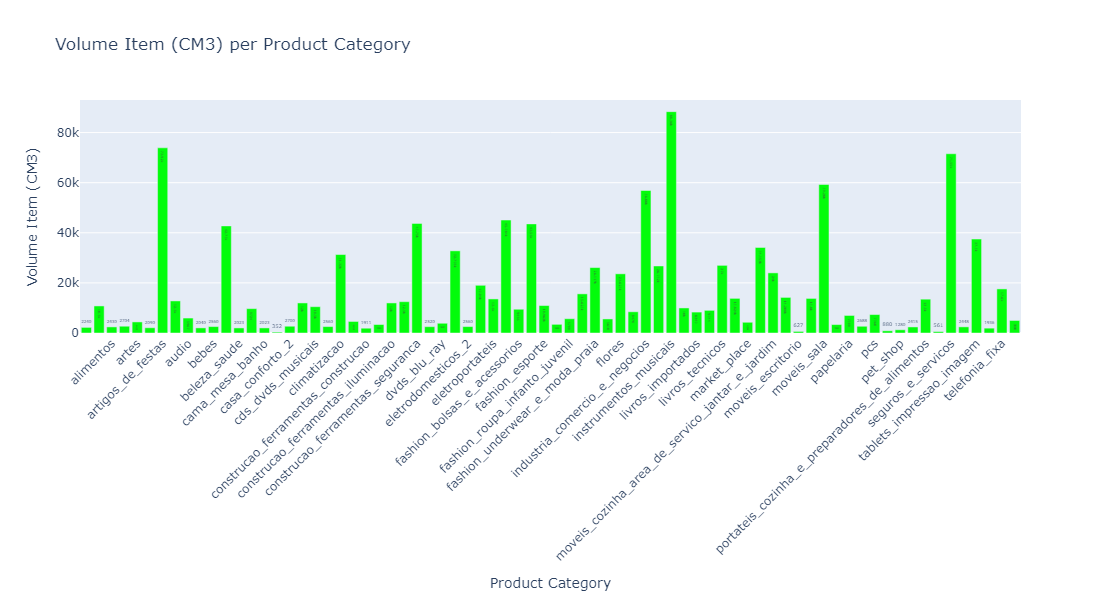

In [26]:
# Membuat bar chart volume category_product menggunakan Plotly
fig = px.bar(df_product_stats, x='product_category_name', y='volume_cm3', 
             labels={'product_category_name':'Product Category', 'volume_cm3':'Volume Item (CM3)'}, 
             title="Volume Item (CM3) per Product Category",
             color_discrete_sequence=['#03fc0b'],
             text_auto=True)  # Menambahkan nilai otomatis di atas bar


# Menambahkan rotasi pada label sumbu x
fig.update_layout(xaxis_tickangle=-45, width=800, height=600)

# Menampilkan plot
fig.show()

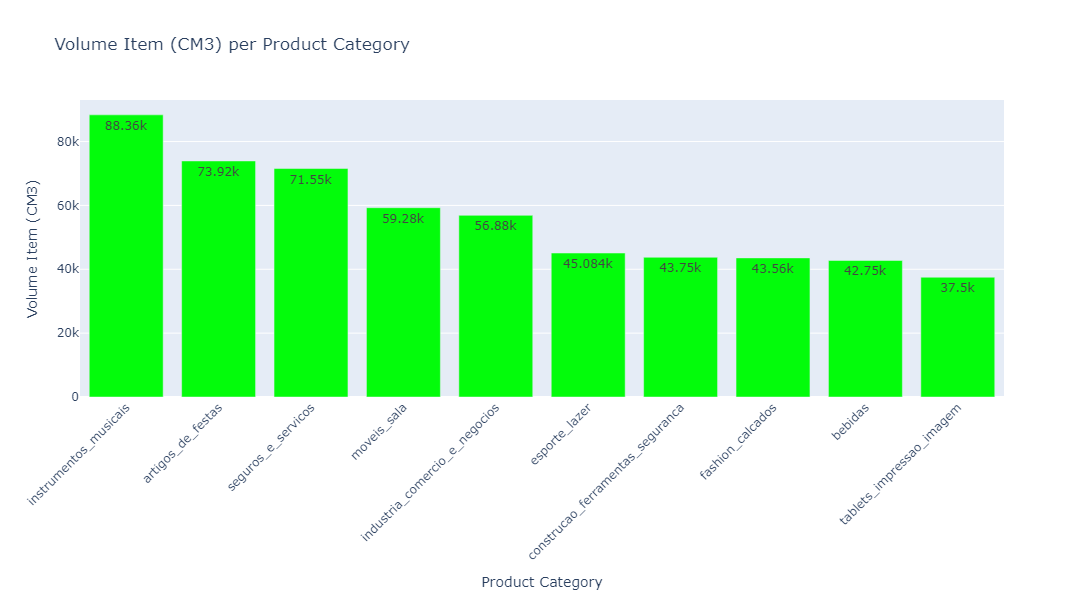

In [27]:
# Membuat Top 10 bar chart volume category_product menggunakan Plotly
# Mengurutkan berdasarkan average_weight dan mengambil top 10
df_top10_volumes = df_product_stats.sort_values(by='volume_cm3', ascending=False).head(10)

# Membuat bar chart menggunakan Plotly
fig = px.bar(df_top10_volumes, x='product_category_name', y='volume_cm3', 
             labels={'product_category_name':'Product Category', 'volume_cm3':'Volume Item (CM3)'}, 
             title="Volume Item (CM3) per Product Category",
             color_discrete_sequence=['#03fc0b'],
             text_auto=True)  # Menambahkan nilai otomatis di atas bar


# Menambahkan rotasi pada label sumbu x
fig.update_layout(xaxis_tickangle=-45, width=800, height=600)

# Menampilkan plot
fig.show()

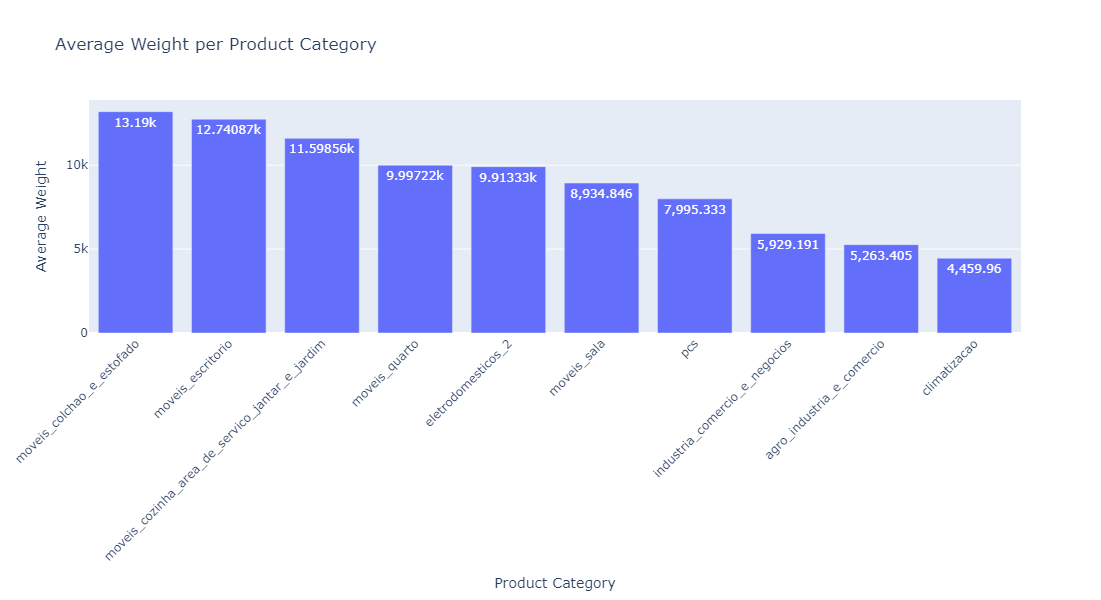

In [28]:
# Membuat top 10 product cateogory bar chart berdasarkan average_weight menggunakan Plotly
df_top10_weight = df_product_stats.sort_values(by='average_weight', ascending=False).head(10)
fig = px.bar(df_top10_weight, x='product_category_name', y='average_weight', 
             labels={'product_category_name':'Product Category', 'average_weight':'Average Weight'}, 
             title="Average Weight per Product Category",
             text_auto=True)  # Menambahkan nilai otomatis di atas bar

# Menambahkan rotasi pada label sumbu x
fig.update_layout(xaxis_tickangle=-45, width=800, height=600)

# Menampilkan plot
fig.show()

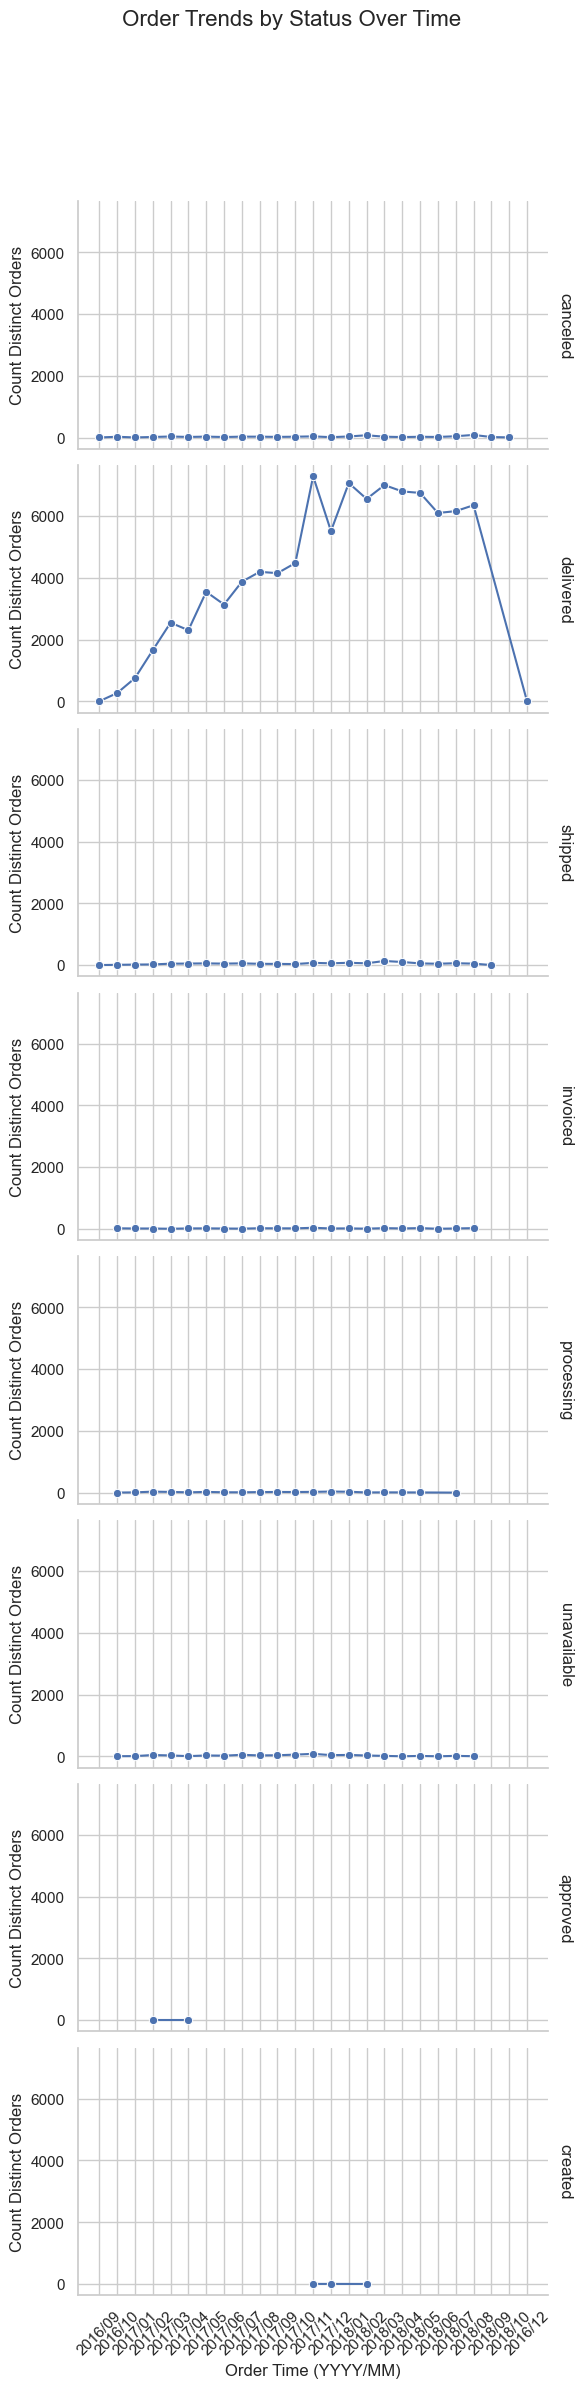

In [29]:
#Membuat line chart order trends berdasarkan order_status

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengubah kolom order_purchase_timestamp menjadi tipe datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Menambah kolom 'year_month' dengan format YYYY/MM
df_orders['year_month'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y/%m')

# Mengelompokkan data berdasarkan 'year_month' dan 'order_status', dan menghitung distinct 'order_id'
df_chartsea = df_orders.groupby(['year_month', 'order_status'])['order_id'].nunique().reset_index()

# Setting Seaborn Theme
sns.set(style="whitegrid")

# Membuat grid plot berdasarkan order_status
g = sns.FacetGrid(df_chartsea, row="order_status", height=3, aspect=2, margin_titles=True)

# Menambahkan lineplot ke setiap subplot
g.map(sns.lineplot, "year_month", "order_id", marker="o")

# Menambahkan judul dan label
g.set_axis_labels("Order Time (YYYY/MM)", "Count Distinct Orders")
g.set_titles(row_template="{row_name}")

# Rotasi x-axis label
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Mengatur layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Order Trends by Status Over Time", fontsize=16)

# Menampilkan chart
plt.show()


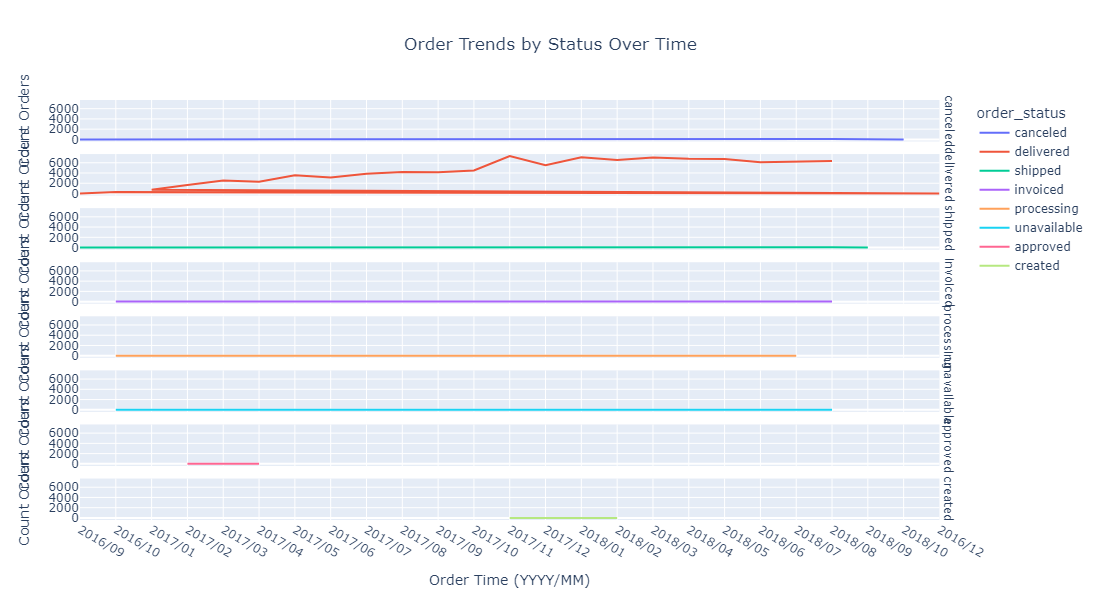

In [30]:
#Membuat subplot order berdasarkan status order
import pandas as pd
import plotly.express as px

# Mengubah kolom order_purchase_timestamp menjadi tipe datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Menambah kolom 'year_month' dengan format YYYY/MM
df_orders['year_month'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y/%m')

# Mengelompokkan data berdasarkan 'year_month' dan 'order_status', dan menghitung distinct 'order_id'
df_my_order = df_orders.groupby(['year_month', 'order_status'])['order_id'].nunique().reset_index()

# Membuat Line chart dengan subplot berdasarkan order_status
fig = px.line(df_my_order, x='year_month', y='order_id', color='order_status',
              line_group='order_status', facet_row='order_status',
              labels={'order_id': 'Count Orders', 'year_month': 'Order Time (YYYY/MM)'},
              title="Order Trends by Status Over Time")

# Update layout agar subplot terlihat rapi
fig.update_layout(height=600, width=900, title_x=0.5)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Menampilkan chart
fig.show()


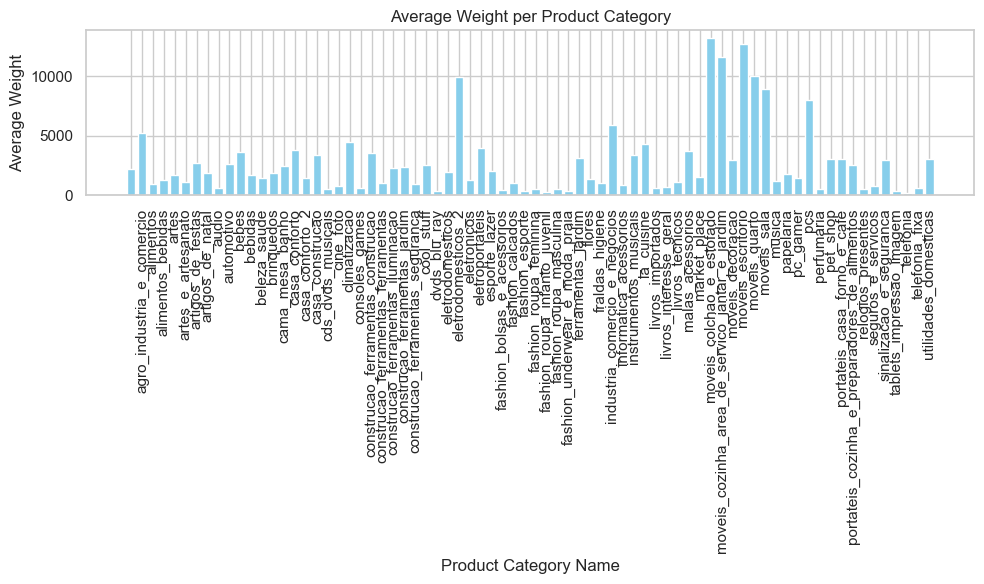

In [31]:
# Membuat bar chart
plt.figure(figsize=(10, 6))  # Ukuran figure
plt.bar(df_product_stats['product_category_name'], df_product_stats['average_weight'], color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Product Category Name')
plt.ylabel('Average Weight')
plt.title('Average Weight per Product Category')

# Rotasi label pada sumbu x agar terbaca lebih mudah
plt.xticks(rotation=90)

# Menampilkan chart
plt.tight_layout()
plt.show()

In [32]:
#mencari tahu frekuensi order berdasarkan hari dan time order 

import pandas as pd

# Mengonversi kolom order_purchase_timestamp menjadi datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Ekstraksi informasi bulan, hari, dan waktu
df_orders['year'] = df_orders['order_purchase_timestamp'].dt.year
df_orders['hour'] = df_orders['order_purchase_timestamp'].dt.hour
df_orders['month'] = df_orders['order_purchase_timestamp'].dt.month
df_orders['day_of_week'] = df_orders['order_purchase_timestamp'].dt.day_name()  # Nama hari (Senin, Selasa, dst.)

# Klasifikasi waktu ke dalam pagi, sore, malam
def classify_time(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Sore'
    else:
        return 'Malam'

df_orders['time_of_day'] = df_orders['hour'].apply(classify_time)

# Mengelompokkan data berdasarkan bulan, hari, dan waktu (pagi, sore, malam)
df_time_day = df_orders.groupby(['year','month', 'day_of_week', 'time_of_day']).size().reset_index(name='order_count')
# Menambahkan kolom 'quartal' berdasarkan kolom 'month'
df_time_day['quartal'] = pd.cut(df_time_day['month'], bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Tampilkan DataFrame hasil
df_time_day

year  month day_of_week time_of_day  order_count quartal
0    2016      9      Monday       Malam            1      Q3
1    2016      9      Sunday       Malam            1      Q3
2    2016      9    Thursday        Sore            1      Q3
3    2016      9     Tuesday        Sore            1      Q3
4    2016     10      Friday       Malam           14      Q4
..    ...    ...         ...         ...          ...     ...
456  2018      9   Wednesday        Sore            1      Q3
457  2018     10      Monday        Sore            1      Q4
458  2018     10     Tuesday       Malam            1      Q4
459  2018     10   Wednesday       Malam            1      Q4
460  2018     10   Wednesday        Sore            1      Q4

[461 rows x 6 columns]

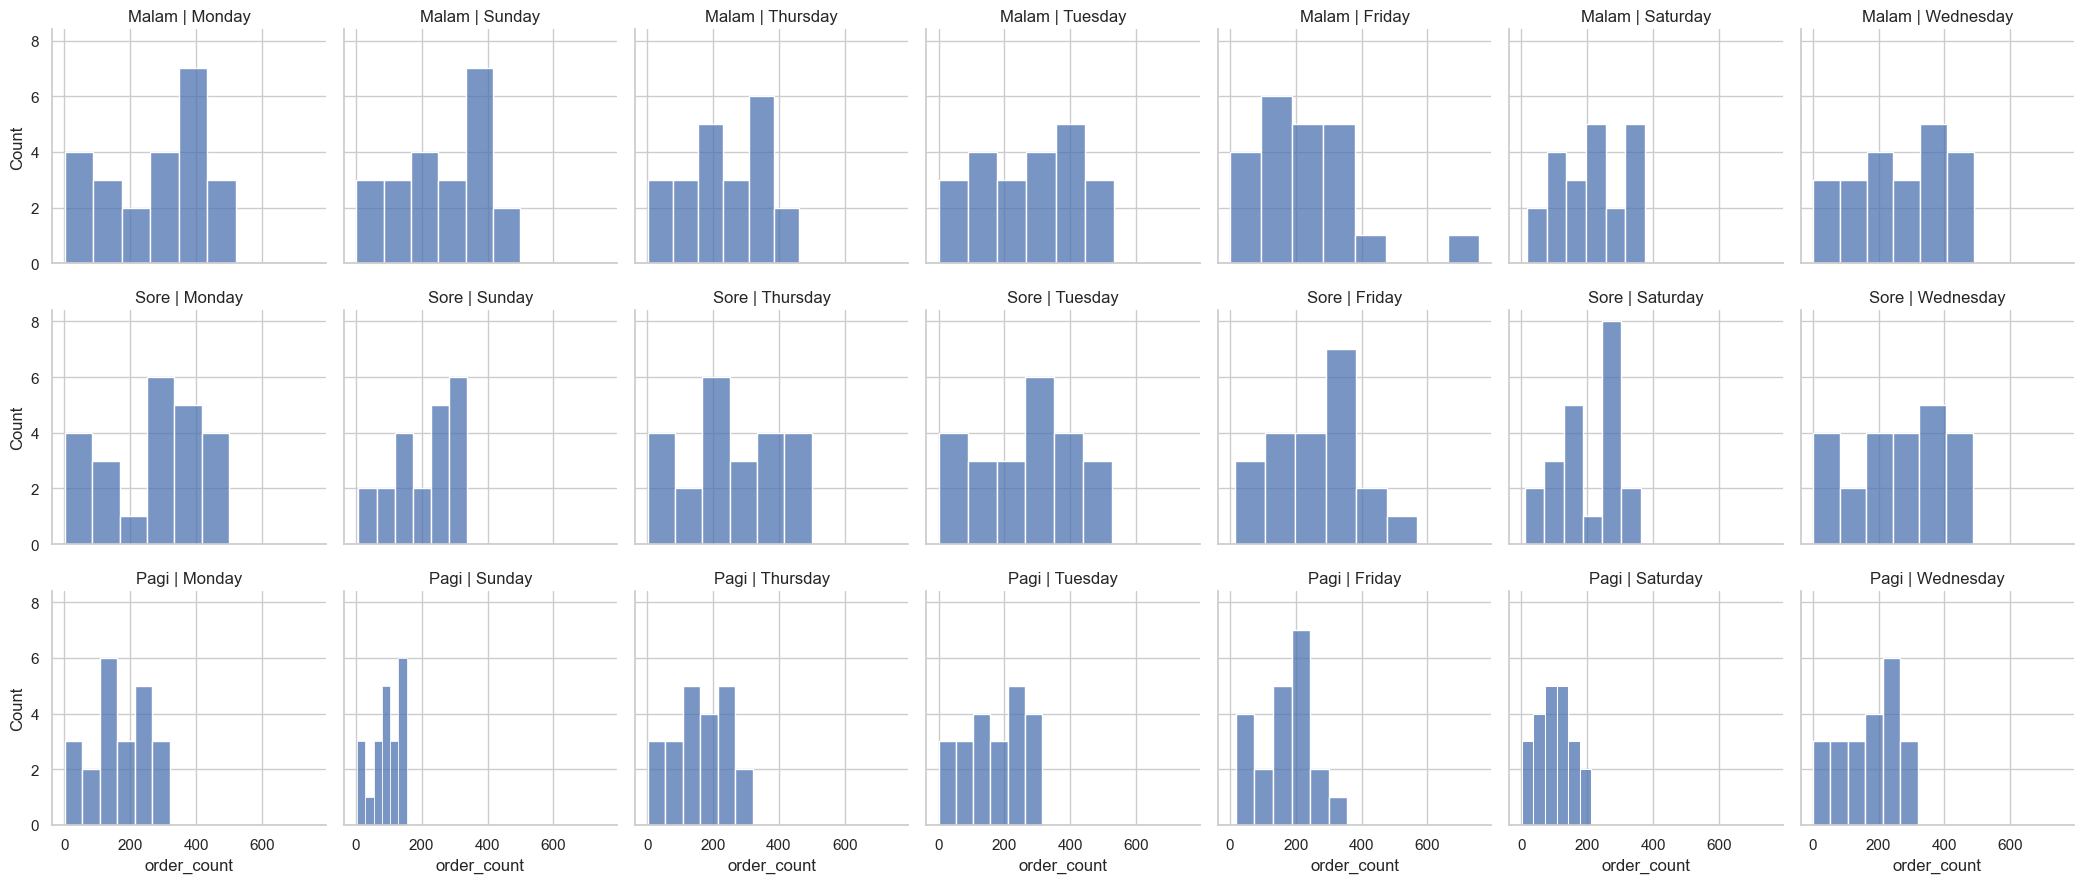

In [33]:
#Membuat bar chart untuk melihat order behaviour berdasarkan time of day dan day of week

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_time_day, col="day_of_week",  row="time_of_day")
g.map_dataframe(sns.histplot, x="order_count")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

C:\Users\user\AppData\Local\Temp\ipykernel_23116\907176203.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



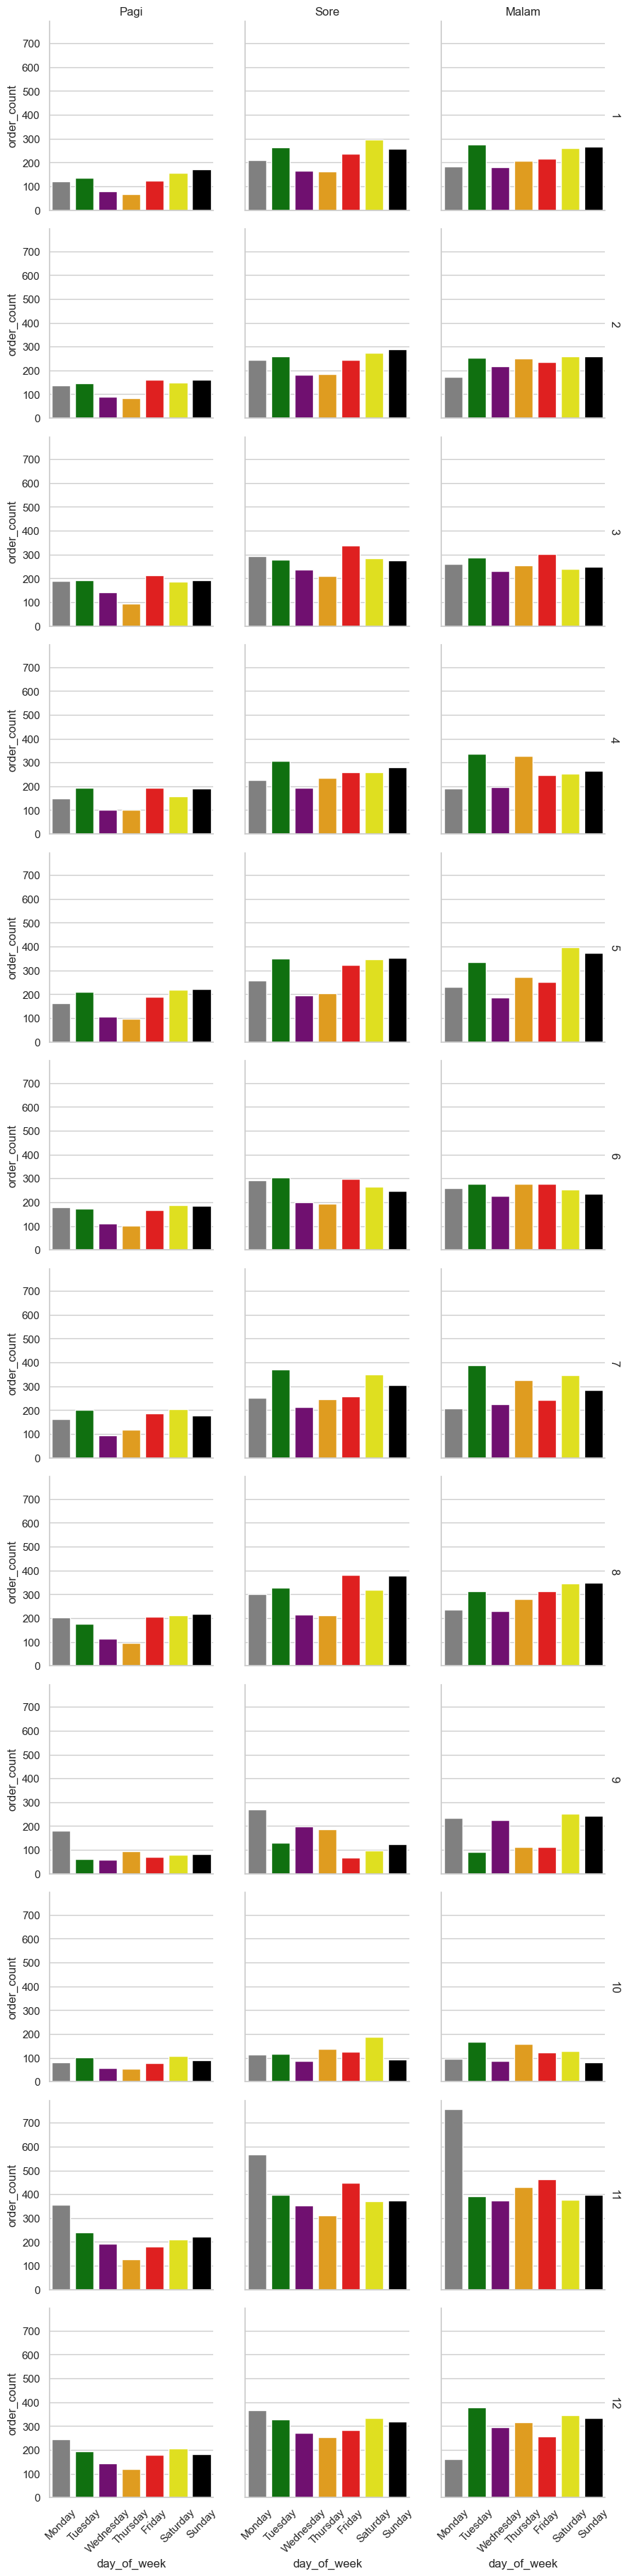

In [34]:
#Membuat subplot bar chart untuk melihat order behaviours berdasarkan day_of_time, day_of_week, dan bulan.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df_grouped adalah DataFrame yang sudah ada
# Contoh: df_grouped = pd.DataFrame({'day_of_week': ['Monday', 'Tuesday', ...], 'order_count': [100, 150, ...], 'time_of_day': ['Pagi', 'Sore', ...], 'month': [1, 1, ...]})

# Definisikan urutan hari dalam seminggu (Monday to Sunday)
time_order = ['Pagi', 'Sore', 'Malam']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Definisikan warna yang diinginkan untuk masing-masing day_of_week
custom_palette = {'Monday': 'green', 'Tuesday': 'yellow', 'Wednesday': 'black', 'Thursday': 'red', 'Friday': 'grey', 'Saturday': 'purple', 'Sunday': 'orange'}

# Menggunakan seaborn's FacetGrid untuk membuat visualisasi
g = sns.FacetGrid(df_time_day, col="time_of_day", row="month", margin_titles=True, col_order=time_order)

# Menggunakan sns.barplot untuk menggambarkan hubungan antara day_of_week dan order_count, dengan hue dan palette custom
g.map_dataframe(sns.barplot, x="day_of_week", y="order_count", hue="day_of_week", hue_order=day_order, palette=custom_palette, errorbar=None)

# Menambahkan legenda
g.add_legend()

# Mengatur judul kolom dan baris berdasarkan template
g.set_titles(row_template='{row_name}', col_template='{col_name}')

# Memastikan urutan x-axis sesuai dengan urutan hari dalam seminggu
for ax in g.axes.flat:
    ax.set_xticklabels(day_order)  # Menetapkan label berdasarkan urutan hari
    ax.set_xticks(range(len(day_order)))  # Pastikan label berada di posisi yang benar
    plt.setp(ax.get_xticklabels(), rotation=45)  # Memutar label x-axis agar lebih terbaca

# Menampilkan plot
plt.savefig('output_chart1.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_23116\1041919858.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



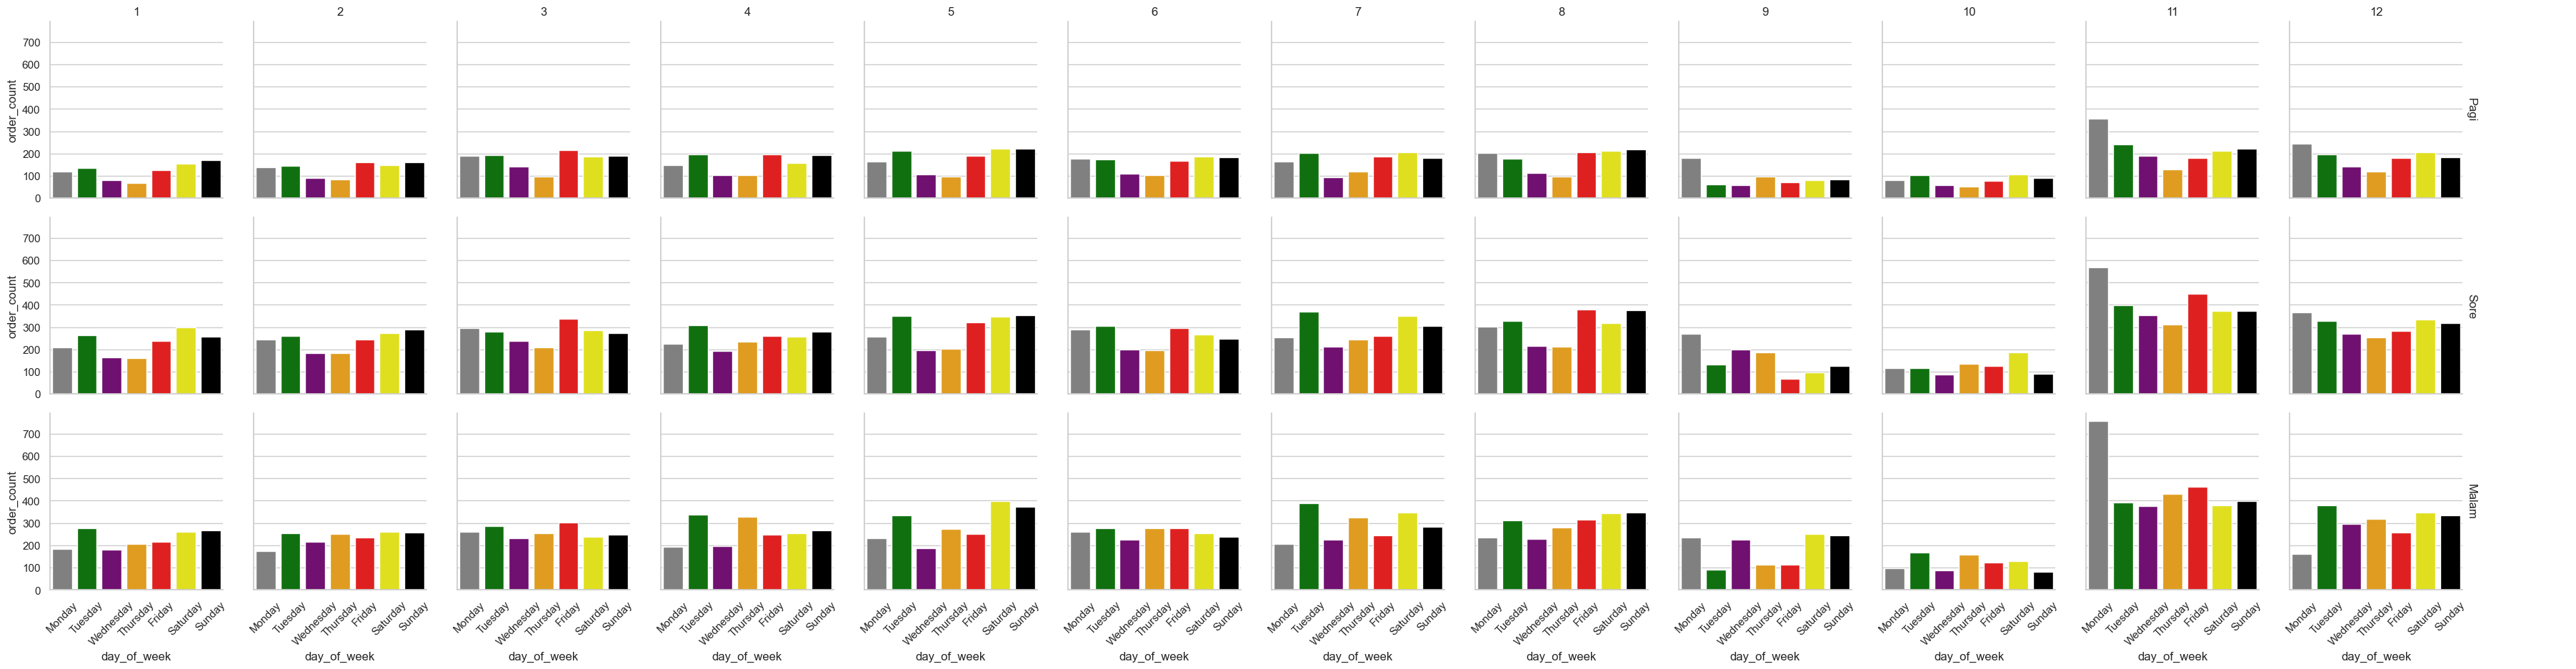

In [35]:
#Mengubah susunan sub plot agar lebih mudah dilihat

import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df_grouped adalah DataFrame yang sudah ada
# Contoh: df_grouped = pd.DataFrame({'day_of_week': ['Monday', 'Tuesday', ...], 'order_count': [100, 150, ...], 'time_of_day': ['Pagi', 'Sore', ...], 'month': [1, 1, ...]})

# Definisikan urutan hari dalam seminggu (Monday to Sunday)
time_order = ['Pagi', 'Sore', 'Malam']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Definisikan warna yang diinginkan untuk masing-masing day_of_week
custom_palette = {'Monday': 'green', 'Tuesday': 'yellow', 'Wednesday': 'black', 'Thursday': 'red', 'Friday': 'grey', 'Saturday': 'purple', 'Sunday': 'orange'}

# Menggunakan seaborn's FacetGrid untuk membuat visualisasi
g = sns.FacetGrid(df_time_day, row="time_of_day", col="month", margin_titles=True, row_order=time_order)

# Menggunakan sns.barplot untuk menggambarkan hubungan antara day_of_week dan order_count, dengan hue dan palette custom
g.map_dataframe(sns.barplot, x="day_of_week", y="order_count", hue="day_of_week", hue_order=day_order, palette=custom_palette, errorbar=None)

# Menambahkan legenda
g.add_legend()

# Mengatur judul kolom dan baris berdasarkan template
g.set_titles(row_template='{row_name}', col_template='{col_name}')

# Memastikan urutan x-axis sesuai dengan urutan hari dalam seminggu
for ax in g.axes.flat:
    ax.set_xticklabels(day_order)  # Menetapkan label berdasarkan urutan hari
    ax.set_xticks(range(len(day_order)))  # Pastikan label berada di posisi yang benar
    plt.setp(ax.get_xticklabels(), rotation=45)  # Memutar label x-axis agar lebih terbaca

# Menampilkan plot
plt.savefig('output_chart2.png', dpi=900, bbox_inches='tight')
plt.show()


code ini hanya percobaan untuk membuat subplot

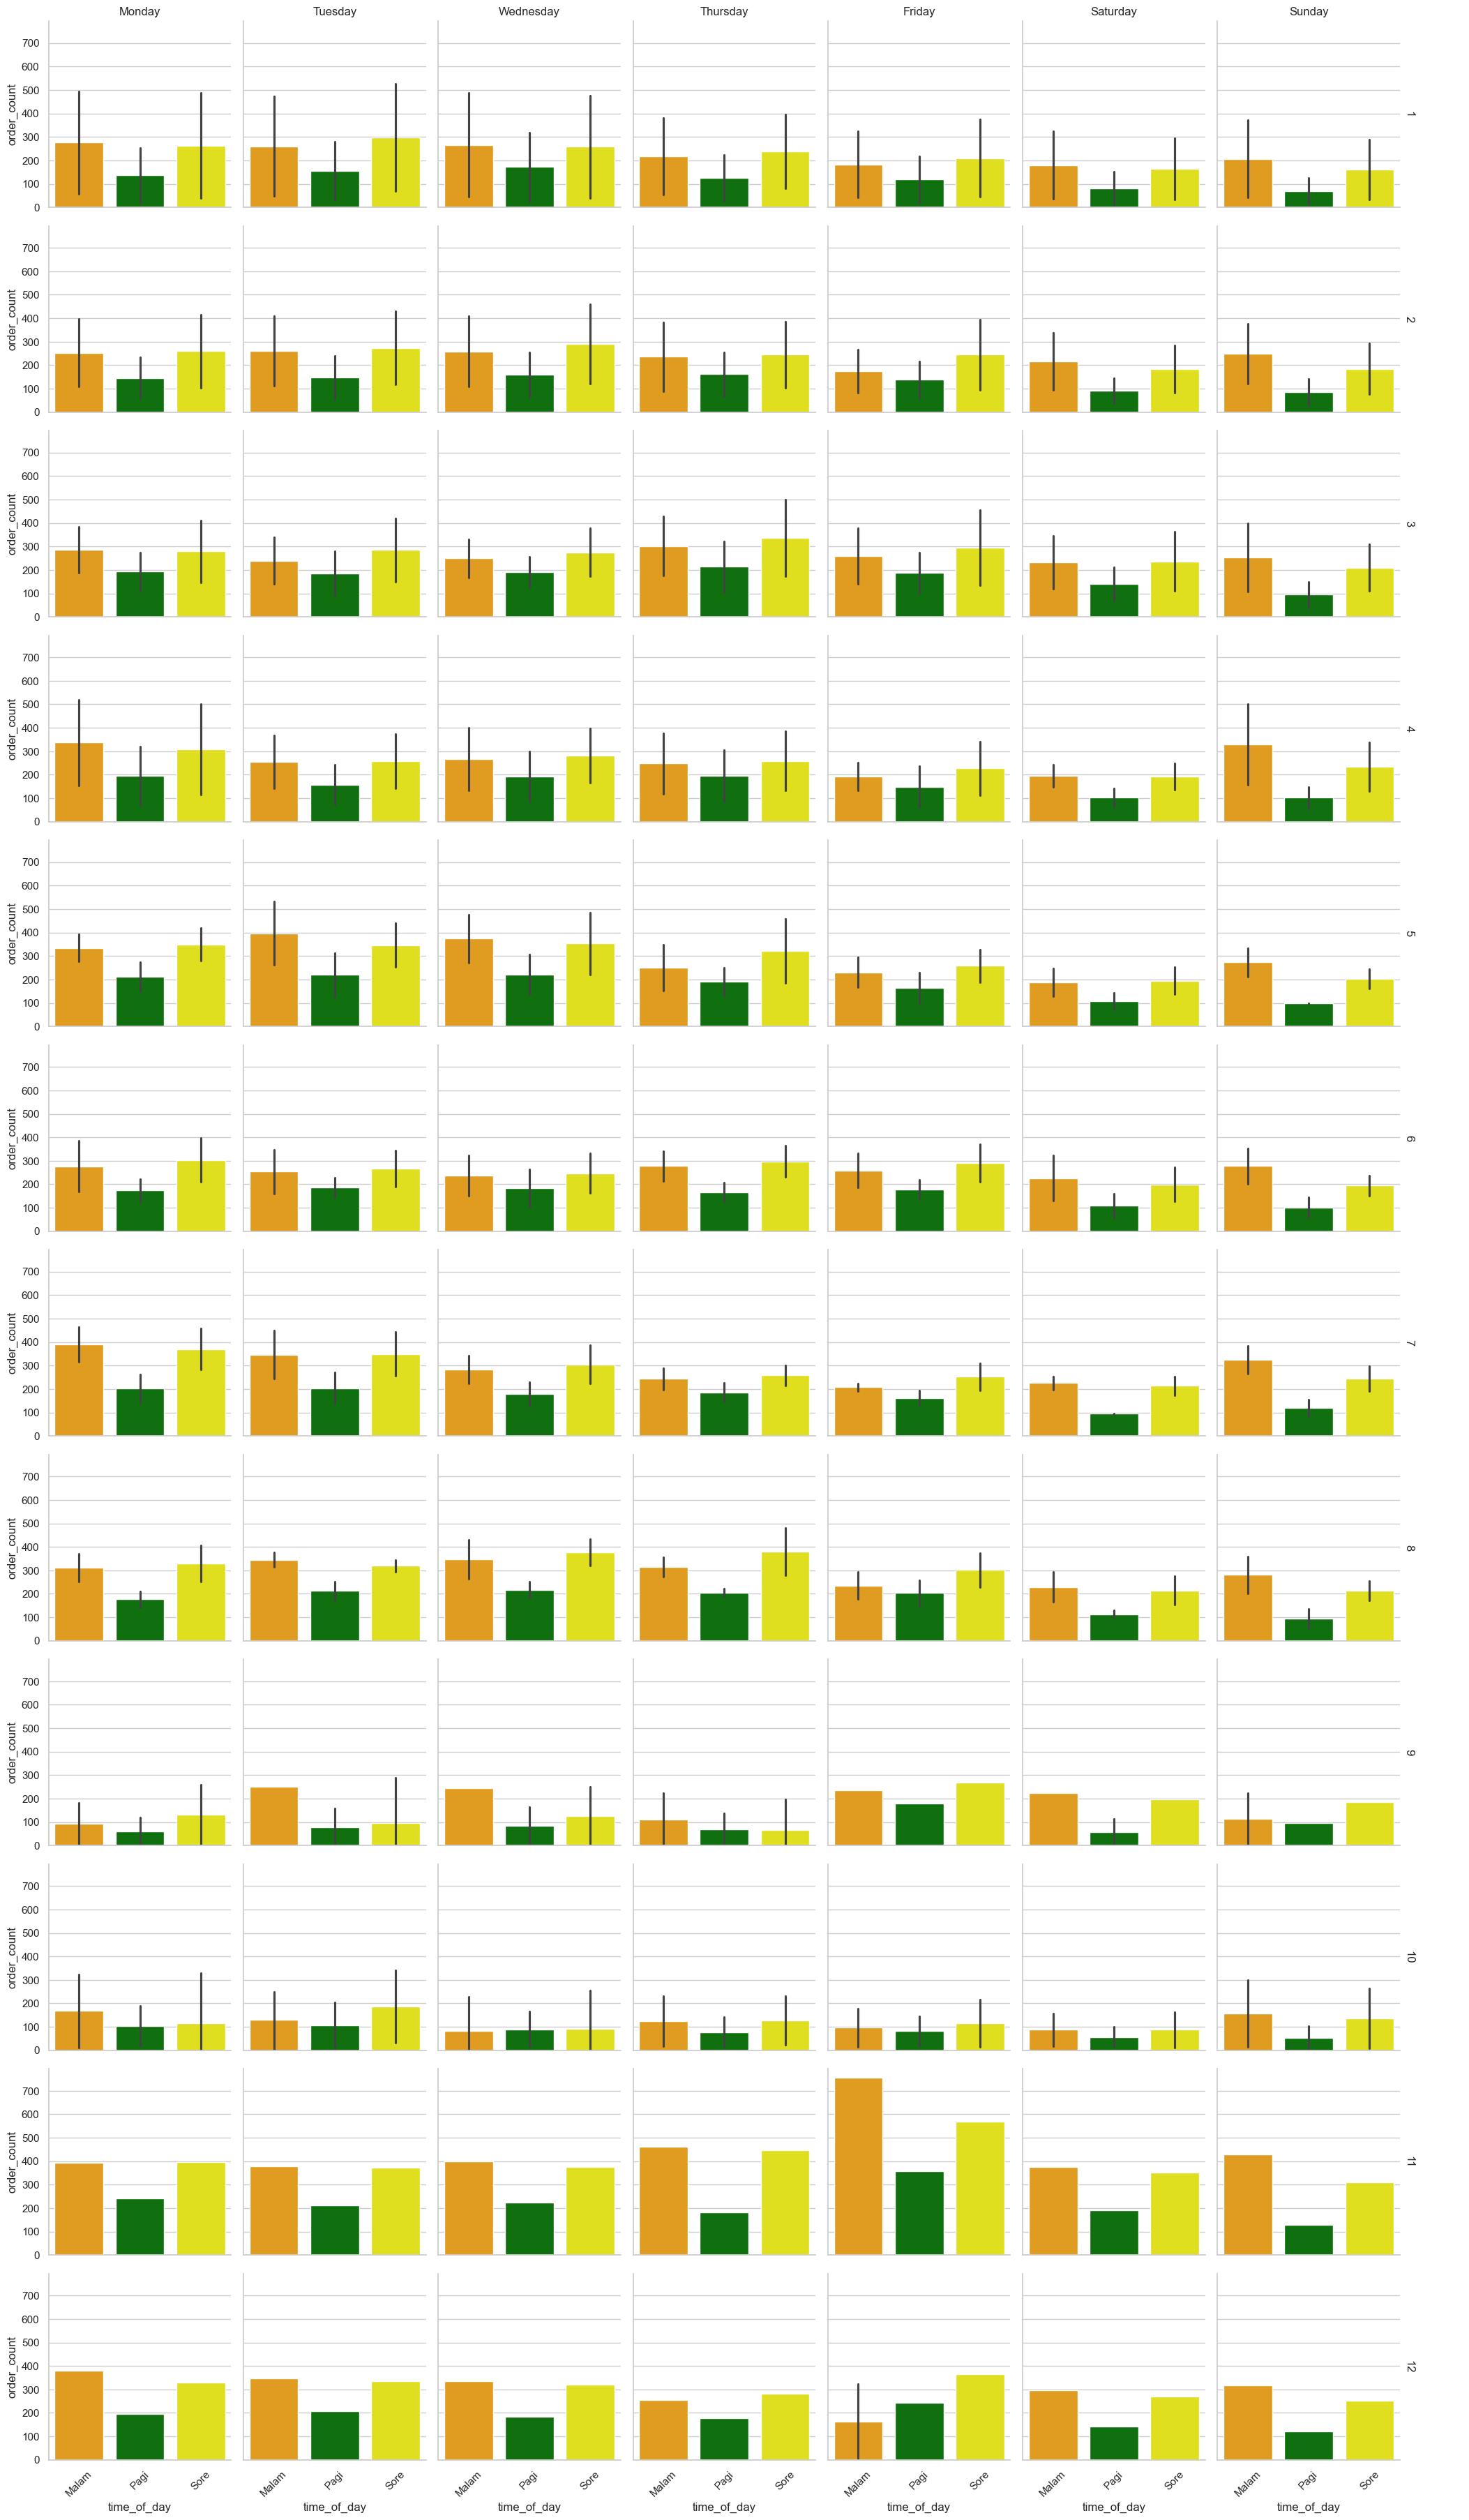

In [37]:
#code ini hanya percobaan untuk membuat subplot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan urutan hari dalam seminggu (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Definisikan warna yang diinginkan untuk masing-masing time_of_day
custom_palette = {'Pagi': 'green', 'Sore': 'yellow', 'Malam': 'orange'}

# Menggunakan seaborn's FacetGrid untuk membuat visualisasi
g = sns.FacetGrid(df_time_day, col="day_of_week", row="month", margin_titles=True, col_order=day_order)

# Menggunakan sns.barplot untuk menggambarkan hubungan antara time_of_day dan order_count, dengan hue dan palette custom
g.map_dataframe(sns.barplot, x="time_of_day", y="order_count", hue="time_of_day", hue_order=['Pagi', 'Sore', 'Malam'], palette=custom_palette)

# Menambahkan legenda untuk time_of_day
g.add_legend()

# Mengatur judul kolom dan baris berdasarkan template
g.set_titles(row_template='{row_name}', col_template='{col_name}')

# Memutar label x-axis agar lebih terbaca
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

# Menyimpan plot sebagai file gambar (misalnya: 'output_chart.png')
plt.savefig('output_chart.png', dpi=300, bbox_inches='tight')

# Menampilkan plot
plt.show()

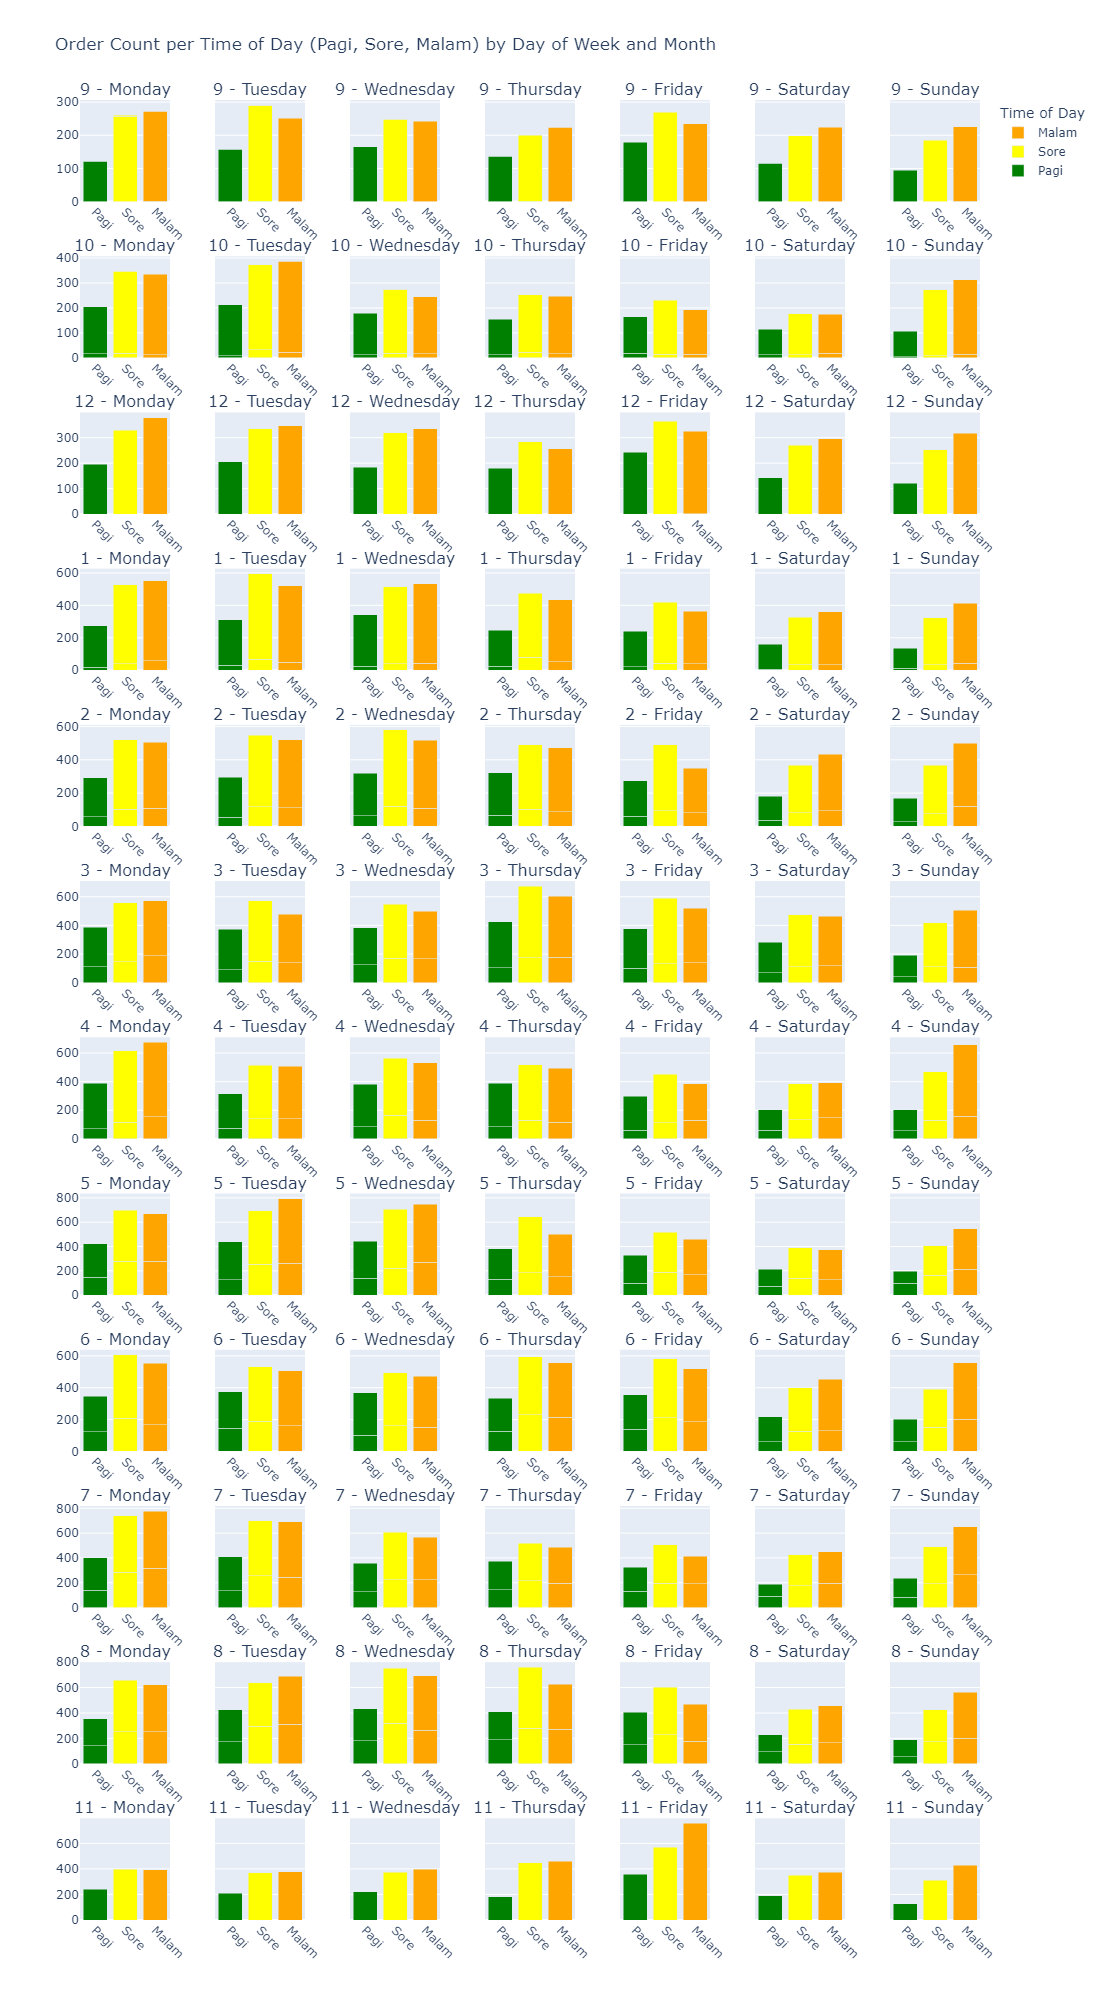

In [38]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Definisikan urutan hari dalam seminggu (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Definisikan warna yang diinginkan untuk masing-masing time_of_day
custom_palette = {'Pagi': 'green', 'Sore': 'yellow', 'Malam': 'orange'}

# Membuat unique kombinasi day_of_week dan month
unique_days = df_time_day['day_of_week'].unique()
unique_months = df_time_day['month'].unique()

# Membuat subplot dengan baris untuk bulan dan kolom untuk hari
fig = make_subplots(
    rows=len(unique_months), cols=len(day_order),
    subplot_titles=[f"{month} - {day}" for month in unique_months for day in day_order],
    shared_yaxes=True,  # Berbagi sumbu Y antar subplot
    vertical_spacing=0.03,  # Kurangi jarak antar baris
    horizontal_spacing=0.05  # Jarak antar kolom
)

# Looping melalui kombinasi day_of_week dan month
for i, month in enumerate(unique_months):
    for j, day in enumerate(day_order):
        # Filter dataframe berdasarkan day_of_week dan month
        df_filtered = df_time_day[(df_time_day['day_of_week'] == day) & (df_time_day['month'] == month)]

        # Tambahkan bar chart ke subplot dengan warna custom_palette
        for time_of_day in ['Pagi', 'Sore', 'Malam']:
            df_time = df_filtered[df_filtered['time_of_day'] == time_of_day]
            fig.add_trace(
                go.Bar(
                    x=df_time['time_of_day'], 
                    y=df_time['order_count'], 
                    name=time_of_day, 
                    marker_color=custom_palette[time_of_day],
                    showlegend=(i == 0 and j == 0)  # Legend hanya muncul di subplot pertama
                ),
                row=i+1, col=j+1
            )

# Mengupdate layout untuk menambah judul dan memutar label sumbu X
fig.update_layout(
    height=2000, width=1400,  # Mengatur ukuran keseluruhan plot, tinggi lebih besar karena lebih banyak subplot
    title_text="Order Count per Time of Day (Pagi, Sore, Malam) by Day of Week and Month",
    barmode='stack',  # Batang di-stacking
    legend_title_text='Time of Day',
)

# Memutar label sumbu X
fig.update_xaxes(tickangle=45)

# Menyimpan plot sebagai file gambar (opsional)
fig.write_image('output_chart.png', scale=3)

# Menampilkan plot interaktif
fig.show()


In [39]:
#Melakukan klasifikasi customer berdasarkan nilai rata - rata order values

import pandas as pd

# Menggabungkan df_orders dan df_orderitems berdasarkan 'order_id'
df_classy = pd.merge(df_orders, df_orderitems, on='order_id')

# Menghitung nilai total pesanan (price + freight_value) untuk setiap order
df_classy['price'] = pd.to_numeric(df_classy['price'], errors='coerce')
df_classy['freight_value'] = pd.to_numeric(df_classy['freight_value'], errors = 'coerce')
df_classy['total_order_value'] = df_classy['price'] + df_classy['freight_value']

# Mengelompokkan berdasarkan 'customer_id' dan menghitung nilai rata-rata total pesanan per customer
df_classy_avg = df_classy.groupby('customer_id').agg(
    avg_order_value=('total_order_value', 'mean')  # Rata-rata nilai total pesanan
).reset_index()

# Mengklasifikasikan harga pesanan rata-rata
def classify_price(avg_order_value):
    if avg_order_value > 2500:
        return 'Mahal'
    elif 1000 <= avg_order_value <= 2500:
        return 'Normal'
    else:
        return 'Murah'

df_classy_avg['price_category'] = df_classy_avg['avg_order_value'].apply(classify_price)

# Menampilkan DataFrame hasil
df_classy_avg


customer_id  avg_order_value price_category
0      00012a2ce6f8dcda20d059ce98491703           114.74          Murah
1      000161a058600d5901f007fab4c27140            67.41          Murah
2      0001fd6190edaaf884bcaf3d49edf079           195.42          Murah
3      0002414f95344307404f0ace7a26f1d5           179.35          Murah
4      000379cdec625522490c315e70c7a9fb           107.01          Murah
...                                 ...              ...            ...
98661  fffcb937e9dd47a13f05ecb8290f4d3e            91.91          Murah
98662  fffecc9f79fd8c764f843e9951b11341            81.36          Murah
98663  fffeda5b6d849fbd39689bb92087f431            63.13          Murah
98664  ffff42319e9b2d713724ae527742af25           214.13          Murah
98665  ffffa3172527f765de70084a7e53aae8            22.75          Murah

[98666 rows x 3 columns]

In [40]:
df_classy_avg.value_counts('price_category')

price_category
Murah     97704
Normal      896
Mahal        66
Name: count, dtype: int64

In [41]:
import pandas as pd

# Menggabungkan df_orderitems dengan df_products untuk mendapatkan kategori produk
df_order_product = pd.merge(df_orderitems, df_products, on='product_id')

In [42]:
#Melihat dataframe
df_order_product

order_id order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214             1   
1       00018f77f2f0320c557190d7a144bdd3             1   
2       000229ec398224ef6ca0657da4fc703e             1   
3       00024acbcdf0a6daa1e931b038114c75             1   
4       00042b26cf59d7ce69dfabb4e55b4fd9             1   
...                                  ...           ...   
112645  fffc94f6ce00a00581880bf54a75a037             1   
112646  fffcd46ef2263f404302a634eb57f7eb             1   
112647  fffce4705a9662cd70adb13d4a31832d             1   
112648  fffe18544ffabc95dfada21779c9644f             1   
112649  fffe41c64501cc87c801fd61db3f6244             1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price freight_value   product_category_name  \
0       2017-09-19 09:45:35   58.90         13.29              cool_stuff   
1       2017-05-03 11:05:13  239.90         19.93                pet_shop   
2       2018-01-18 14:48:30  199.00         17.87        moveis_decoracao   
3       2018-08-15 10:10:18   12.99         12.79              perfumaria   
4       2017-02-13 13:57:51  199.90         18.14      ferramentas_jardim   
...                     ...     ...           ...                     ...   
112645  2018-05-02 04:11:01  299.99         43.41   utilidades_domesticas   
112646  2018-07-20 04:31:48  350.00         36.53  informatica_acessorios   
112647  2017-10-30 17:14:25   99.90         16.95           esporte_lazer   
112648  2017-08-21 00:04:32   55.99          8.72  informatica_acessorios   
112649  2018-06-12 17:10:13   43.00         12.79         cama_mesa_banho   

       product_name_lenght product_description_lenght product_photos_qty  \
0                       58                        598                  4   
1                       56                        239                  2   
2                       59                        695                  2   
3                       42                        480                  1   
4                       59                        409                  1   
...                    ...                        ...                ...   
112645                  43                       1002                  3   
112646                  31                        232                  1   
112647                  43                        869                  1   
112648                  56                       1306                  1   
112649                  47                        511                  1   

        product_weight_g  product_length_cm  product_height_cm  \
0                  650.0               28.0                9.0   
1                30000.0               50.0               30.0   
2                 3050.0               33.0               13.0   
3                  200.0               16.0               10.0   
4                 3750.0               35.0               40.0   
...                  ...                ...                ...   
112645           10150.0               89.0               15.0   
112646            8950.0        

In [43]:
#Melakukan penghitungan nilai freq_orders, volume_orders, volume_freight, volume_total_order berdasarkan pengelompokkan product_category_name

import pandas as pd

# Menggabungkan df_orderitems dengan df_products untuk mendapatkan kategori produk
df_order_product = pd.merge(df_orderitems, df_products, on='product_id')
df_order_product['price'] = pd.to_numeric(df_order_product['price'], errors='coerce')
df_order_product['freight_value'] = pd.to_numeric(df_order_product['freight_value'], errors = 'coerce')
df_order_product['total_order_value'] = df_order_product['price'] + df_order_product['freight_value']
# Menghitung freq_orders dan volume_orders berdasarkan product_category_name
df_order_product['total_order_value'] = df_order_product['price'] + df_order_product['freight_value']
df_freq_ord = df_order_product.groupby('product_category_name').agg(
    freq_orders=('order_id', 'count'),        # Menghitung jumlah order (frekuensi pesanan)
    volume_orders=('price', 'sum'),            # Menghitung total nilai pesanan (volume pesanan)
    volume_freight=('freight_value', 'sum'),
    volume_total_order=('total_order_value', 'sum')
).reset_index()

# Menampilkan DataFrame hasil
df_freq_ord


product_category_name  freq_orders  volume_orders  volume_freight  \
0                                     1603      179535.28        28169.81   
1   agro_industria_e_comercio          212       72530.47         5843.60   
2                   alimentos          510       29393.41         7271.03   
3           alimentos_bebidas          278       15179.48         4507.99   
4                       artes          209       24202.64         4045.17   
..                        ...          ...            ...             ...   
69    sinalizacao_e_seguranca          199       21509.23         6507.82   
70   tablets_impressao_imagem           83        7528.41         1226.20   
71                  telefonia         4545      323667.53        71215.79   
72             telefonia_fixa          264       59583.00         4637.81   
73      utilidades_domesticas         6964      632248.66       146149.11   

    volume_total_order  
0            207705.09  
1             78374.07  
2             36664.44  
3             19687.47  
4             28247.81  
..                 ...  
69            28017.05  
70             8754.61  
71           394883.32  
72            64220.81  
73           778397.77  

[74 rows x 5 columns]

STEP 8: Review Customer

In [45]:
#Menghitung average score dan tingkat kepuasan customer

import pandas as pd

# Menggabungkan df_reviews dengan df_orders untuk mendapatkan customer_id terkait setiap ulasan
df_review_orders = pd.merge(df_reviews, df_orders, on='order_id')

# Menggabungkan dengan df_customers untuk mendapatkan informasi pelanggan
df_review_customers = pd.merge(df_review_orders, df_customers, on='customer_id')
df_review_customers['review_score'] = pd.to_numeric(df_review_customers['review_score'], errors='coerce')

# Menghitung skor ulasan rata-rata untuk setiap customer_unique_id
df_customer_reviews = df_review_customers.groupby('customer_unique_id').agg(
    avg_review_score=('review_score', 'mean')
).reset_index()

# Menambahkan kolom tingkat kepuasan
df_customer_reviews['satisfaction'] = df_customer_reviews['avg_review_score'].apply(
    lambda x: 'Puas' if x >= 4 else 'Tidak Puas'
)

# Menampilkan hanya kolom customer_unique_id, avg_review_score, dan satisfaction
df_review_score = df_customer_reviews[['customer_unique_id', 'avg_review_score', 'satisfaction']]

# Menampilkan hasil akhir
df_review_score


customer_unique_id  avg_review_score satisfaction
0      0000366f3b9a7992bf8c76cfdf3221e2               5.0         Puas
1      0000b849f77a49e4a4ce2b2a4ca5be3f               4.0         Puas
2      0000f46a3911fa3c0805444483337064               3.0   Tidak Puas
3      0000f6ccb0745a6a4b88665a16c9f078               4.0         Puas
4      0004aac84e0df4da2b147fca70cf8255               5.0         Puas
...                                 ...               ...          ...
95375  fffcf5a5ff07b0908bd4e2dbc735a684               5.0         Puas
95376  fffea47cd6d3cc0a88bd621562a9d061               4.0         Puas
95377  ffff371b4d645b6ecea244b27531430a               5.0         Puas
95378  ffff5962728ec6157033ef9805bacc48               5.0         Puas
95379  ffffd2657e2aad2907e67c3e9daecbeb               5.0         Puas

[95380 rows x 3 columns]

In [46]:
#Melihat value kolom satisfaction
df_review_score.value_counts('satisfaction')

satisfaction
Puas          73302
Tidak Puas    22078
Name: count, dtype: int64

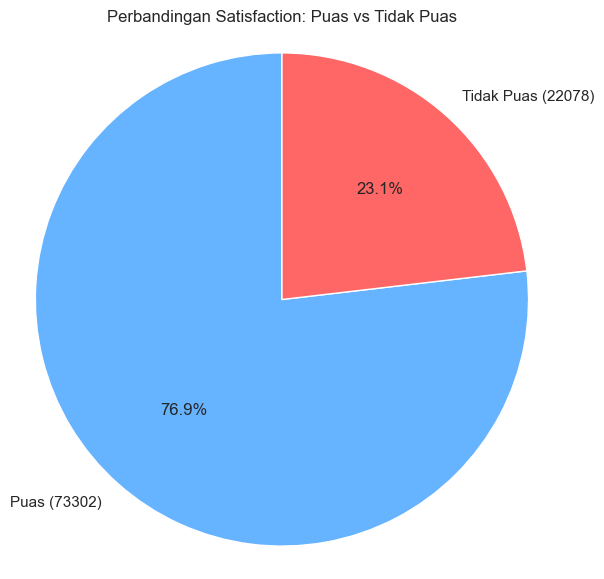

In [47]:
#Membuat Pie chart perbandingan kepuasan customer

import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah customer yang puas dan tidak puas
satisfaction_counts = df_review_score['satisfaction'].value_counts()

# Membuat pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    satisfaction_counts,
    labels=[f'{label} ({count})' for label, count in satisfaction_counts.items()],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff6666']
)

# Menambahkan judul
plt.title('Perbandingan Satisfaction: Puas vs Tidak Puas')

# Menampilkan pie chart
plt.axis('equal')  # Agar pie chart berbentuk bulat
plt.show()


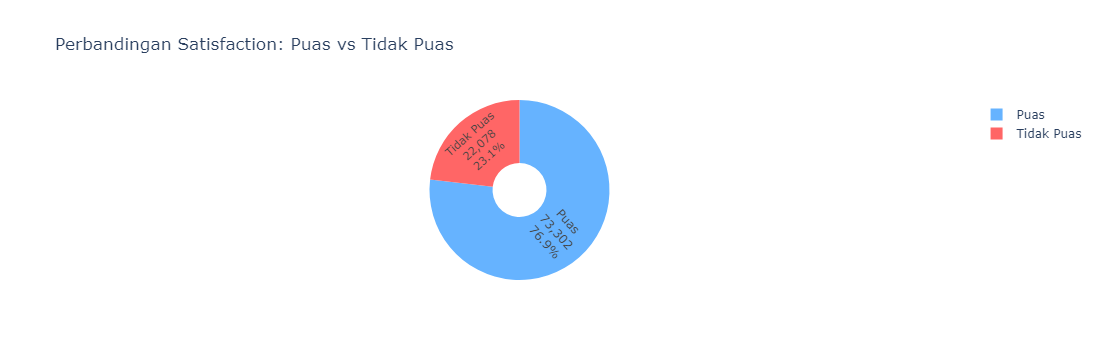

In [82]:
##Membuat Pie chart perbandingan kepuasan customer menggunakan plotly agar lebih interaktif

import plotly.express as px
import pandas as pd

# Menghitung jumlah customer yang puas dan tidak puas
satisfaction_counts = df_review_score['satisfaction'].value_counts()

# Membuat pie chart dengan Plotly
fig = px.pie(
    values=satisfaction_counts,
    names=satisfaction_counts.index,
    title='Perbandingan Satisfaction: Puas vs Tidak Puas',
    color_discrete_sequence=['#66b3ff', '#ff6666'],  # Warna untuk masing-masing kategori
    hole=0.3  # Untuk membuat diagram donut, sesuaikan nilai jika tidak diinginkan
)

# Menambahkan label presentase pada pie chart
fig.update_traces(textposition='inside', textinfo='percent+label+value')

# Menampilkan pie chart
fig.show()


In [48]:
# # Langkah 1: Menghitung jumlah order untuk setiap customer_id
# order_counts = df_orders.groupby('customer_id').size().reset_index(name='order_count')

# # Langkah 2: Menggabungkan dengan df_customers untuk mendapatkan customer_unique_id
# order_counts = pd.merge(order_counts, df_customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# # Langkah 3: Mengelompokkan berdasarkan customer_unique_id
# final_counts = order_counts.groupby('customer_unique_id')['order_count'].sum().reset_index()

import pandas as pd

# Menggabungkan df_reviews dengan df_orders untuk mendapatkan customer_id terkait setiap ulasan
df_review_orders = pd.merge(df_reviews, df_orders, on='order_id')

# Menggabungkan dengan df_customers untuk mendapatkan informasi pelanggan
df_review_customers = pd.merge(df_review_orders, df_customers, on='customer_id')
df_review_customers['review_score'] = pd.to_numeric(df_review_customers['review_score'], errors='coerce')

# Memilih ulasan yang memiliki judul dan pesan (non-null)
df_reviews_filtered = df_review_customers.dropna(subset=['review_comment_title', 'review_comment_message'])

# Menghitung total ulasan untuk setiap pelanggan
df_total_reviews = df_reviews_filtered.groupby('customer_unique_id').size().reset_index(name='total_reviews')

In [49]:
# Menggabungkan tabel total ulasan dengan total pesanan berdasarkan customer_id
df_review_by_cust = pd.merge(final_counts,df_total_reviews, on='customer_unique_id', how='left')

In [50]:
df_review_by_cust

customer_unique_id  order_count   class  total_reviews
0      0000366f3b9a7992bf8c76cfdf3221e2            1  rendah            1.0
1      0000b849f77a49e4a4ce2b2a4ca5be3f            1  rendah            1.0
2      0000f46a3911fa3c0805444483337064            1  rendah            1.0
3      0000f6ccb0745a6a4b88665a16c9f078            1  rendah            1.0
4      0004aac84e0df4da2b147fca70cf8255            1  rendah            1.0
...                                 ...          ...     ...            ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684            1  rendah            1.0
96092  fffea47cd6d3cc0a88bd621562a9d061            1  rendah            1.0
96093  ffff371b4d645b6ecea244b27531430a            1  rendah            1.0
96094  ffff5962728ec6157033ef9805bacc48            1  rendah            1.0
96095  ffffd2657e2aad2907e67c3e9daecbeb            1  rendah            1.0

[96096 rows x 4 columns]

In [51]:
# Menggabungkan tabel total ulasan dengan total pesanan berdasarkan customer_id
df_review_by_cust = pd.merge(final_counts,df_total_reviews, on='customer_unique_id', how='left')

# Menambahkan kolom rasio ulasan per transaksi (total_reviews / total_orders)
df_review_by_cust['review_to_order_ratio'] = df_review_by_cust['total_reviews'] / df_review_by_cust['order_count']
df_review_by_cust = df_review_by_cust.drop(['class'], axis=1)

# Menampilkan DataFrame hasil
df_review_by_cust

customer_unique_id  order_count  total_reviews  \
0      0000366f3b9a7992bf8c76cfdf3221e2            1            1.0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f            1            1.0   
2      0000f46a3911fa3c0805444483337064            1            1.0   
3      0000f6ccb0745a6a4b88665a16c9f078            1            1.0   
4      0004aac84e0df4da2b147fca70cf8255            1            1.0   
...                                 ...          ...            ...   
96091  fffcf5a5ff07b0908bd4e2dbc735a684            1            1.0   
96092  fffea47cd6d3cc0a88bd621562a9d061            1            1.0   
96093  ffff371b4d645b6ecea244b27531430a            1            1.0   
96094  ffff5962728ec6157033ef9805bacc48            1            1.0   
96095  ffffd2657e2aad2907e67c3e9daecbeb            1            1.0   

       review_to_order_ratio  
0                        1.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        1.0  
...                      ...  
96091                    1.0  
96092                    1.0  
96093                    1.0  
96094                    1.0  
96095                    1.0  

[96096 rows x 4 columns]

In [52]:
df_review_by_cust.value_counts('review_to_order_ratio')

review_to_order_ratio
1.000000    94893
1.500000      240
2.000000      164
0.500000       35
1.333333       21
1.666667       16
0.666667        3
0.333333        2
1.200000        2
1.250000        2
1.166667        1
1.400000        1
Name: count, dtype: int64

In [53]:
#Melakukan penghitungan recency tiap customer

import pandas as pd

# Misalkan df_customers dan df_orders sudah didefinisikan sebelumnya
# df_customers = pd.read_csv('path_to_customers.csv')
# df_orders = pd.read_csv('path_to_orders.csv')

# Langkah 1: Mengonversi kolom order_purchase_timestamp ke tipe datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Langkah 2: Melakukan merge antara df_orders dan df_customers
df_cust_ords = pd.merge(df_orders, df_customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')


# Langkah 3: Mengelompokkan data berdasarkan customer_unique_id untuk mendapatkan tanggal transaksi terakhir
last_transaction_dates = df_cust_ords.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
last_transaction_dates.columns = ['customer_unique_id', 'last_transaction_date']

# Langkah 4: Menentukan tanggal transaksi akhir (tanggal terbaru dari seluruh transaksi)
final_transaction_date = df_cust_ords['order_purchase_timestamp'].max()

# Langkah 5: Menambahkan kolom tanggal transaksi akhir dan menghitung selisih hari
last_transaction_dates['final_transaction_date'] = final_transaction_date
last_transaction_dates['days_difference'] = (last_transaction_dates['final_transaction_date'] - last_transaction_dates['last_transaction_date']).dt.days

# Menampilkan hasil
last_transaction_dates


customer_unique_id last_transaction_date  \
0      0000366f3b9a7992bf8c76cfdf3221e2   2018-05-10 10:56:27   
1      0000b849f77a49e4a4ce2b2a4ca5be3f   2018-05-07 11:11:27   
2      0000f46a3911fa3c0805444483337064   2017-03-10 21:05:03   
3      0000f6ccb0745a6a4b88665a16c9f078   2017-10-12 20:29:41   
4      0004aac84e0df4da2b147fca70cf8255   2017-11-14 19:45:42   
...                                 ...                   ...   
96091  fffcf5a5ff07b0908bd4e2dbc735a684   2017-06-08 21:00:36   
96092  fffea47cd6d3cc0a88bd621562a9d061   2017-12-10 20:07:56   
96093  ffff371b4d645b6ecea244b27531430a   2017-02-07 15:49:16   
96094  ffff5962728ec6157033ef9805bacc48   2018-05-02 15:17:41   
96095  ffffd2657e2aad2907e67c3e9daecbeb   2017-05-02 20:18:45   

      final_transaction_date  days_difference  
0        2018-10-17 17:30:18              160  
1        2018-10-17 17:30:18              163  
2        2018-10-17 17:30:18              585  
3        2018-10-17 17:30:18              369  
4        2018-10-17 17:30:18              336  
...                      ...              ...  
96091    2018-10-17 17:30:18              495  
96092    2018-10-17 17:30:18              310  
96093    2018-10-17 17:30:18              617  
96094    2018-10-17 17:30:18              168  
96095    2018-10-17 17:30:18              532  

[96096 rows x 4 columns]

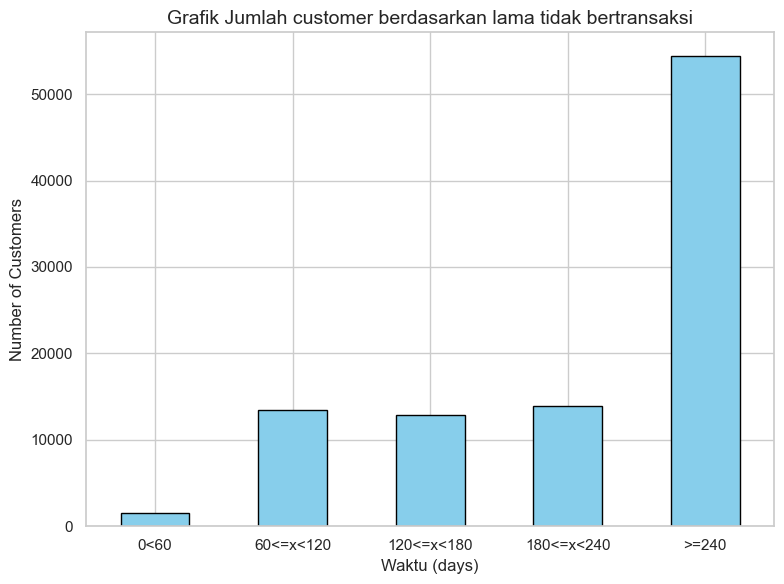

In [54]:
#Membuat bar chart berdasarkan tingkat recency customer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Menentukan rentang aging (kategori umur)
bins = [0, 60, 120, 180, 240, np.inf]
labels = ['0<60', '60<=x<120', '120<=x<180', '180<=x<240', '>=240']

df_aging = last_transaction_dates.copy()

# Menambahkan kolom aging berdasarkan kategori
df_aging['aging_category'] = pd.cut(df_aging['days_difference'], bins=bins, labels=labels, right=False)

# Menghitung jumlah customer dalam setiap kategori
aging_count = df_aging['aging_category'].value_counts(sort=False)

# Membuat bar plot untuk aging customer
plt.figure(figsize=(8, 6))
aging_count.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan judul dan label
plt.title('Grafik Jumlah customer berdasarkan lama tidak bertransaksi', fontsize=14)
plt.xlabel('Waktu (days)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Menampilkan grafik
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


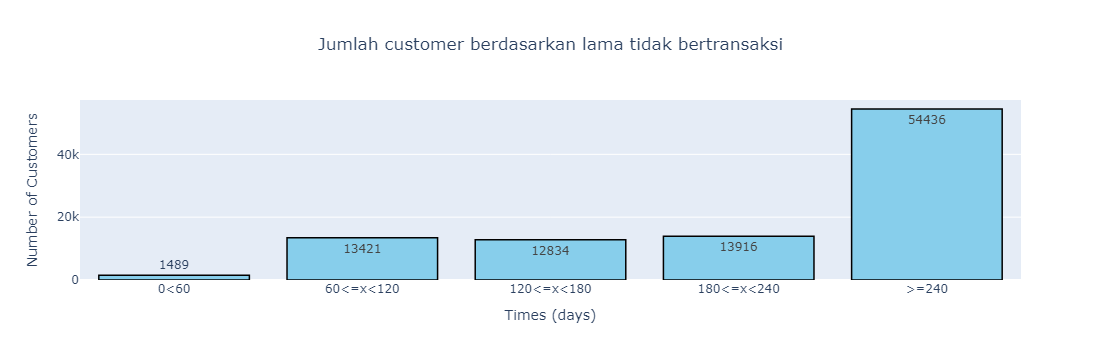

In [55]:
#merapikan bar chart berdasarkan tingkat recency customer
import pandas as pd
import numpy as np
import plotly.express as px

# # Menentukan rentang aging (kategori umur)
# bins = [0, 30, 60, 90, 120, np.inf]
# labels = ['<30', '30<=x<60', '60<=x<90', '90<=x<120', '>=120']

# # Menambahkan kolom aging berdasarkan kategori
# df['aging_category'] = pd.cut(df['days_difference'], bins=bins, labels=labels, right=)

# Menghitung jumlah customer dalam setiap kategori
aging_count = df_aging['aging_category'].value_counts(sort=False).reset_index()
aging_count.columns = ['Aging Category', 'Number of Customers']

# Membuat bar plot menggunakan Plotly
fig = px.bar(aging_count, 
             x='Aging Category', 
             y='Number of Customers', 
             title='Jumlah customer berdasarkan lama tidak bertransaksi',
             labels={'Aging Category': 'Times (days)', 'Number of Customers': 'Number of Customers'},
             text='Number of Customers',
             template='plotly')

# Menambahkan beberapa gaya ke grafik
fig.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1.5, textposition='auto')
fig.update_layout(title_x=0.5)  # Title di tengah

# Menampilkan grafik
fig.show()


In [56]:
df_aging.value_counts('aging_category')

aging_category
>=240         54436
180<=x<240    13916
60<=x<120     13421
120<=x<180    12834
0<60           1489
Name: count, dtype: int64

In [57]:
#Mencari tingkat churn

import pandas as pd

# Membuat DataFrame df_orders

# Konversi kolom 'order_purchase_timestamp' ke tipe datetime
df_order_churn = df_orders.copy()
df_order_churn['order_purchase_timestamp'] = pd.to_datetime(df_order_churn['order_purchase_timestamp'])

# Buat kolom 'month_year' dengan format MM-YYYY
df_order_churn['month_year'] = df_order_churn['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah unique customers setiap bulan
monthly_customers = df_order_churn.groupby('month_year')['customer_id'].nunique().reset_index()
monthly_customers.columns = ['month_year', 'unique_customers']

# Mendapatkan list pelanggan aktif setiap periode (MM-YYYY)
active_customers = df_order_churn.groupby('month_year')['customer_id'].unique().reset_index()
active_customers.columns = ['month_year', 'active_customers']

# Menghitung pelanggan churn (yang aktif di bulan sebelumnya tapi tidak di bulan berikutnya)
churn_data = []
previous_customers = set()

for index, row in active_customers.iterrows():
    current_customers = set(row['active_customers'])
    if previous_customers:
        churn_customers = previous_customers - current_customers
        churn_rate = len(churn_customers) / len(previous_customers) if previous_customers else 0
        churn_data.append({'month_year': row['month_year'], 'churn_rate': churn_rate})
    previous_customers = current_customers

# Membuat DataFrame churn
df_churn = pd.DataFrame(churn_data)

# Menggabungkan jumlah pelanggan unik dengan tingkat churn
df_result = pd.merge(monthly_customers, df_churn, on='month_year', how='left')

# Menampilkan hasil
df_result


month_year  unique_customers  churn_rate
0     2016-09                 4         NaN
1     2016-10               324         1.0
2     2016-12                 1         1.0
3     2017-01               800         1.0
4     2017-02              1780         1.0
5     2017-03              2682         1.0
6     2017-04              2404         1.0
7     2017-05              3700         1.0
8     2017-06              3245         1.0
9     2017-07              4026         1.0
10    2017-08              4331         1.0
11    2017-09              4285         1.0
12    2017-10              4631         1.0
13    2017-11              7544         1.0
14    2017-12              5673         1.0
15    2018-01              7269         1.0
16    2018-02              6728         1.0
17    2018-03              7211         1.0
18    2018-04              6939         1.0
19    2018-05              6873         1.0
20    2018-06              6167         1.0
21    2018-07              6292         1.0
22    2018-08              6512         1.0
23    2018-09                16         1.0
24    2018-10                 4         1.0

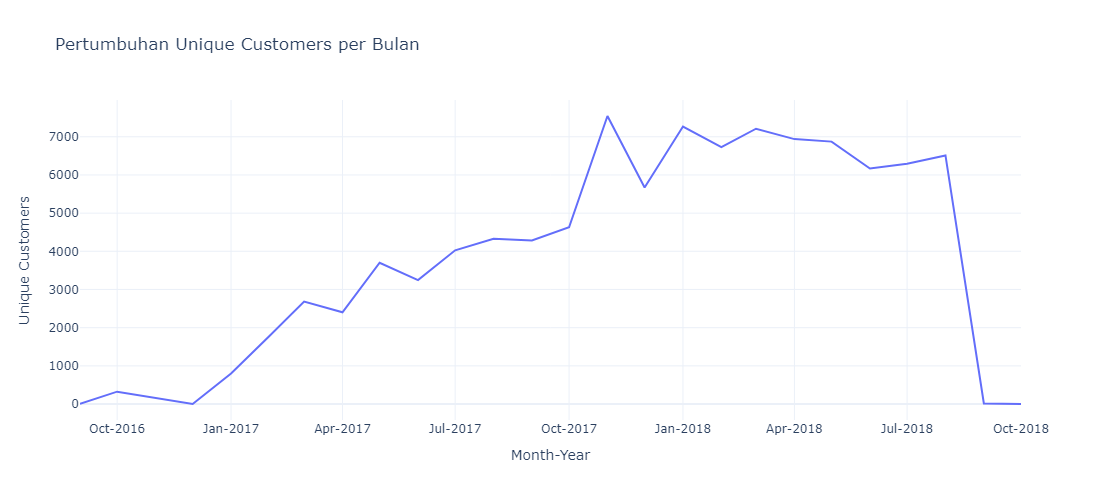

In [70]:
#Membuat grafik tingkat churn customers

import plotly.express as px
import pandas as pd

# DataFrame contoh (df_result mengacu pada data yang Anda gunakan sebelumnya)
df_cust_pop = df_result.copy()

# Mengonversi kolom 'month_year' ke tipe datetime dengan format YYYY-MM
df_cust_pop['month_year'] = df_cust_pop['month_year'].dt.to_timestamp()
df_cust_pop['month_year'] = pd.to_datetime(df_cust_pop['month_year'], format='%Y-%m')

# Membuat line chart menggunakan Plotly Express
fig = px.line(df_cust_pop, x='month_year', y='unique_customers', 
              labels={'month_year':'Month-Year', 'unique_customers':'Unique Customers'},
              title='Pertumbuhan Unique Customers per Bulan')

# Mengupdate layout untuk tampilan yang lebih rapi
fig.update_layout(xaxis_title='Month-Year', yaxis_title='Unique Customers', 
                  width=800, height=500, 
                  xaxis_tickformat='%b-%Y', template='plotly_white')

# Menampilkan plot
fig.show()


In [68]:
#Membuat dataframe untuk mengetahui fd_order( first order date), ld_order(last order dates), fd_freq(order frequency in first date), ld_freq(order frequency in last date), selisih_freq.

import pandas as pd

# Misalkan data tersedia sebagai berikut
# df_customers = pd.read_csv('path_to_customers_data.csv')
# df_orders = pd.read_csv('path_to_orders_data.csv')

# Membuat DataFrame

# Pastikan format tanggal pada kolom 'order_purchase_timestamp'
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Gabungkan df_orders dengan df_customers untuk mendapatkan customer_unique_id
df_merged = pd.merge(df_orders, df_customers, on='customer_id', how='inner')

# Group by customer_unique_id untuk mendapatkan order pertama dan terakhir
df_grouped = df_merged.groupby('customer_unique_id').agg(
    fd_order=('order_purchase_timestamp', 'min'),  # Tanggal order pertama
    ld_order=('order_purchase_timestamp', 'max')   # Tanggal order terakhir
).reset_index()

# Hitung frekuensi pesanan pada order pertama (fd_freq)
fd_freq = df_merged[df_merged['order_purchase_timestamp'] == df_merged.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')].groupby('customer_unique_id').size().reset_index(name='fd_freq')

# Hitung frekuensi pesanan pada order terakhir (ld_freq)
ld_freq = df_merged[df_merged['order_purchase_timestamp'] == df_merged.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')].groupby('customer_unique_id').size().reset_index(name='ld_freq')

# Gabungkan hasil frekuensi dengan df_grouped
df_grouped = pd.merge(df_grouped, fd_freq, on='customer_unique_id', how='left')
df_grouped = pd.merge(df_grouped, ld_freq, on='customer_unique_id', how='left')

# Hitung selisih frekuensi
df_grouped['selisih_freq'] = df_grouped['ld_freq'] - df_grouped['fd_freq']

# Tampilkan DataFrame hasil
df_grouped


customer_unique_id            fd_order  \
0      0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27   
1      0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27   
2      0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03   
3      0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41   
4      0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42   
...                                 ...                 ...   
96091  fffcf5a5ff07b0908bd4e2dbc735a684 2017-06-08 21:00:36   
96092  fffea47cd6d3cc0a88bd621562a9d061 2017-12-10 20:07:56   
96093  ffff371b4d645b6ecea244b27531430a 2017-02-07 15:49:16   
96094  ffff5962728ec6157033ef9805bacc48 2018-05-02 15:17:41   
96095  ffffd2657e2aad2907e67c3e9daecbeb 2017-05-02 20:18:45   

                 ld_order  fd_freq  ld_freq  selisih_freq  
0     2018-05-10 10:56:27        1        1             0  
1     2018-05-07 11:11:27        1        1             0  
2     2017-03-10 21:05:03        1        1             0  
3     2017-10-12 20:29:41        1        1             0  
4     2017-11-14 19:45:42        1        1             0  
...                   ...      ...      ...           ...  
96091 2017-06-08 21:00:36        1        1             0  
96092 2017-12-10 20:07:56        1        1             0  
96093 2017-02-07 15:49:16        1        1             0  
96094 2018-05-02 15:17:41        1        1             0  
96095 2017-05-02 20:18:45        1        1             0  

[96096 rows x 6 columns]

In [72]:
#Melihat apakah ada selih pada selisih_freq
df_grouped[(df_grouped['selisih_freq'] > 0) | (df_grouped['selisih_freq'] < 0)]

customer_unique_id            fd_order  \
2495   06a52782a04f0086d16b9c22d0e29438 2017-05-06 20:11:10   
13281  23339103d82a054f9729b0554ce22e8c 2018-05-30 16:57:26   
14299  25f3cf83109f636d52d288fa4e797111 2018-02-25 21:01:07   
17436  2e43e031f10de28e557c35ef668f9396 2017-01-26 13:15:41   
20337  35ecdf6858edc6427223b64804cf028e 2017-08-05 14:55:19   
25098  42befda568ea0df110b6cec63c233bea 2017-10-09 12:17:50   
26566  46958f708ade6b6a88b2e5aca1e66de5 2017-08-30 06:22:57   
27043  47c1a3033b8b77b3ab6e109eb4d5fdf3 2017-08-07 14:14:22   
30808  51d91326ffc0688da14a001de38c264b 2017-08-15 21:44:47   
37959  64df076fb557552498049bb07ed1cd5f 2018-04-25 10:52:10   
39873  69f2934ad8b50cc05587a94cc7d68fc9 2017-12-01 14:38:00   
40579  6bb535b0906b43e0041916897667aeed 2017-06-08 22:46:23   
41906  6f64406ed5cfa4a2d9bd35e91bfd6587 2017-12-11 09:46:54   
43352  732d307839b02bc2d3a4c26b515ea2b9 2017-12-12 21:09:11   
44920  7779fdf670bfe673e064b9aa5447674e 2017-05-24 13:17:55   
52579  8c21dd8c37144807c601f99f2a209dfb 2017-05-10 09:00:07   
64640  abfe742e782fb10f5c824fcb849e5cd1 2017-08-18 14:30:19   
65583  ae74c314b9c383e5d7bcd99d54ffbc71 2017-05-08 00:45:17   
69037  b7b162291adff744d6f3c6450557ffee 2017-07-23 15:56:36   
70111  ba87a137c5191264841e0be40e53f4ed 2018-02-21 08:39:02   
72220  c0118e2c0a037c31aeca71d0b81f66a1 2017-08-07 09:14:30   
76126  ca994abc57b0bd7981d91d0061b3d8d6 2017-07-13 21:03:44   
79559  d3882d7abd0c66064d740d7ed04dd1ef 2018-02-14 11:52:12   
80775  d6df1c8cb71c59d9b52d828dc6d0f5b3 2018-04-19 08:26:02   
84049  df946ef265626b1e0a425292815ddead 2017-07-21 22:46:13   
85377  e325e139452a1ca05f5a33acedd7d94f 2017-11-27 11:33:51   
85392  e3301490c373db9263c15a73172d0c6f 2017-03-29 16:12:13   
87031  e78838df9c44e102b6ac84cc5eea7d5c 2017-02-07 22:52:43   
90531  f11821d908830e74ad782532ebed897a 2017-05-17 04:26:46   
91344  f34cd7fd85a1f8baff886edf09567be3 2017-08-22 12:49:28   
91944  f4d1502ace38b0df6f052a5544add9f4 2017-11-10 22:50:03   

                 ld_order  fd_freq  ld_freq  selisih_freq  
2495  2017-05-06 20:11:11        2        1            -1  
13281 2018-06-16 11:58:28        1        2             1  
14299 2018-02-25 21:01:08        2        1            -1  
17436 2017-01-26 13:15:42        2        1            -1  
20337 2018-03-31 21:18:49        2        1            -1  
25098 2018-03-23 13:44:28        1        2             1  
26566 2017-08-30 06:22:58        1        2             1  
27043 2018-01-24 15:15:26        2        1            -1  
30808 2017-08-26 18:31:19        2        1            -1  
37959 2018-05-10 10:13:46        2        1            -1  
39873 2018-03-05 18:15:17        2        1            -1  
40579 2017-09-17 18:12:09        2        1            -1  
41906 2018-02-06 15:10:03        2        1            -1  
43352 2018-03-03 21:49:27        1        2             1  
44920 2017-08-03 06:04:15        2        1            -1  
52579 2018-05-20 20:41:30        2        1            -1  
64640 2017-08-18 14:30:22        1        2             1  
65583 2017-06-07 13:16:14        2        1            -1  
69037 2018-07-27 07:57:16        2        1            -1  
70111 2018-02-21 08:39:03        1        2             1  
72220 2018-03-29 19:17:49        2        1            -1  
76126 2017-08-21 14:50:46        2        1            -1  
79559 2018-02-14 11:52:13        1        2             1  
80775 2018-04-19 08:26:03        1        2             1  
84049 2017-08-01 13:45:24        1        2             1  
85377 2018-01-04 10:16:03        2        1            -1  
85392 2017-04-20 11:56:40        1        2             1  
87031 2017-02-07 22:52:44        1        2             1  
90531 2017-08-21 00:36:28        2        1            -1  
91344 2017-09-23 19:56:00        2        1            -1  
91944 2018-04-11 23:14:26        1        2             1

In [74]:
#menghitung selisih
df_grouped.value_counts('selisih_freq')

selisih_freq
 0    96065
-1       19
 1       12
Name: count, dtype: int64

STEP 9: Time Series Analysis

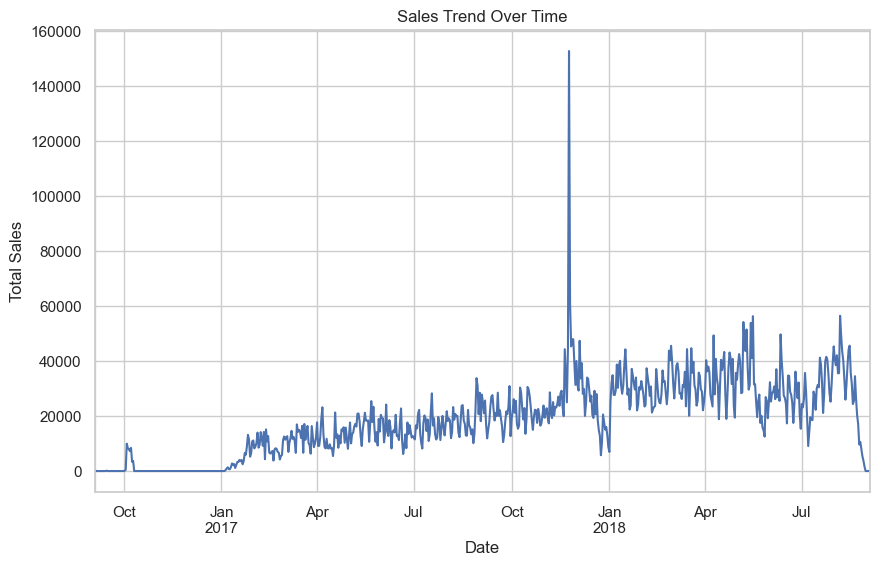

In [76]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_orderitems and df_orders are already loaded dataframes

# Merge df_orderitems with df_orders on 'order_id'
df_times = pd.merge(df_orderitems, df_orders[['order_id', 'order_purchase_timestamp']],
                     on='order_id', how='inner')

# Convert 'order_purchase_timestamp' to datetime format (if not already)
df_times['order_purchase_timestamp'] = pd.to_datetime(df_times['order_purchase_timestamp'])
df_times['price'] = pd.to_numeric(df_times['price'], errors='coerce')
df_times['freight_value'] = pd.to_numeric(df_times['freight_value'], errors = 'coerce')
df_times['total_order_value'] = df_times['price'] + df_times['freight_value']

# Create a new column for total sales (price * quantity of each order item)
df_times['total_sales'] = df_times['price']  # Assuming each row represents one item

# Set 'order_purchase_timestamp' as the index for resampling
df_times.set_index('order_purchase_timestamp', inplace=True)

# Resample data on a monthly basis and calculate total sales per month
df_time_series = df_times['total_sales'].resample('D').sum()

# Plot the time series
plt.figure(figsize=(10, 6))
df_time_series.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
